## Customer Churn Prediction
Predict whether a customer is going to churn based on the various usage parameters of the online E-Commerce company

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5,palette='tab10')
sns.set_style(style='white')

In [187]:
data=pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')
data_eda=data.copy()
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [133]:
print(data.Churn.value_counts())
data.Churn.value_counts(normalize=True)

0    4682
1     948
Name: Churn, dtype: int64


0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [134]:
data[['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore']].describe().T

count       mean       std  min  25%   50%   75%  \
Tenure                    5366.0  10.189899  8.557241  0.0  2.0   9.0  16.0   
WarehouseToHome           5379.0  15.639896  8.531475  5.0  9.0  14.0  20.0   
HourSpendOnApp            5375.0   2.931535  0.721926  0.0  2.0   3.0   3.0   
NumberOfDeviceRegistered  5630.0   3.688988  1.023999  1.0  3.0   4.0   4.0   
SatisfactionScore         5630.0   3.066785  1.380194  1.0  2.0   3.0   4.0   

                            max  
Tenure                     61.0  
WarehouseToHome           127.0  
HourSpendOnApp              5.0  
NumberOfDeviceRegistered    6.0  
SatisfactionScore           5.0

#CC and Credit card gives different churn rate.
#It could be credit card of different bank/company.So I am keeping it as it is for now.
#In next iteration we can try to merge CC

In [193]:
data['CityTier'] = data['CityTier'].apply(lambda x: 'Tier-1' if x == 1 else ('Tier-2' if x == 2 else 'Tier-3'))
data_eda = data.copy()
data_eda['Churn'] = data_eda['Churn'].apply(lambda x : 'Yes' if x == 1 else 'No')
data_eda['Complain'] = data_eda['Complain'].apply(lambda x: 'Yes' if x == 1 else 'No')
data_eda['SatisfactionScore']=data_eda['SatisfactionScore'].astype('str')

[Text(0, 0, 'Debit Card'),
 Text(0, 0, 'Credit Card'),
 Text(0, 0, 'E wallet'),
 Text(0, 0, 'UPI'),
 Text(0, 0, 'COD'),
 Text(0, 0, 'CC'),
 Text(0, 0, 'Cash on Delivery')]

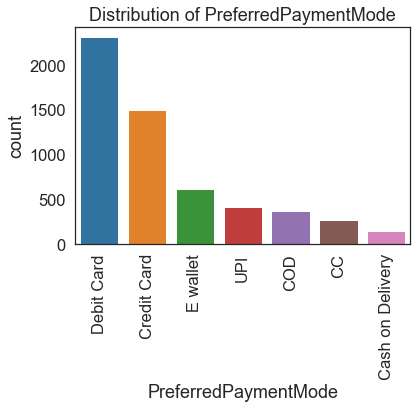

In [136]:
a=sns.countplot(data_eda['PreferredPaymentMode'],order=data_eda['PreferredPaymentMode'].value_counts(normalize=True).index)
a.set_title("Distribution of PreferredPaymentMode")
a.set_xticklabels(data_eda['PreferredPaymentMode'].value_counts().index,rotation = 90)

[Text(0, 0, 'Laptop & Accessory'),
 Text(0, 0, 'Mobile Phone'),
 Text(0, 0, 'Fashion'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Grocery'),
 Text(0, 0, 'Others')]

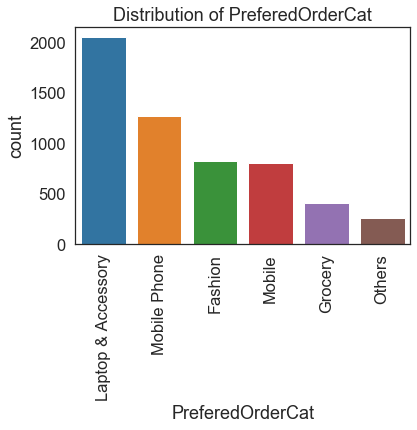

In [137]:
a=sns.countplot(data_eda['PreferedOrderCat'],order=data_eda['PreferedOrderCat'].value_counts(normalize=True).index)
a.set_title("Distribution of PreferedOrderCat")
a.set_xticklabels(data_eda['PreferedOrderCat'].value_counts().index,rotation = 90)

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

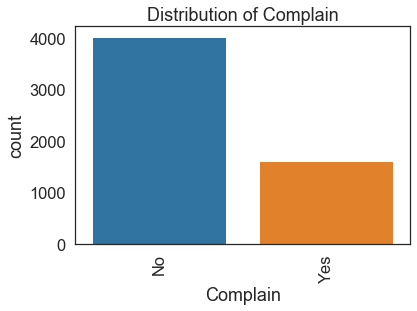

In [138]:
a=sns.countplot(data_eda['Complain'],order=data_eda['Complain'].value_counts(normalize=True).index)
a.set_title("Distribution of Complain")
a.set_xticklabels(data_eda['Complain'].value_counts().index,rotation = 90)

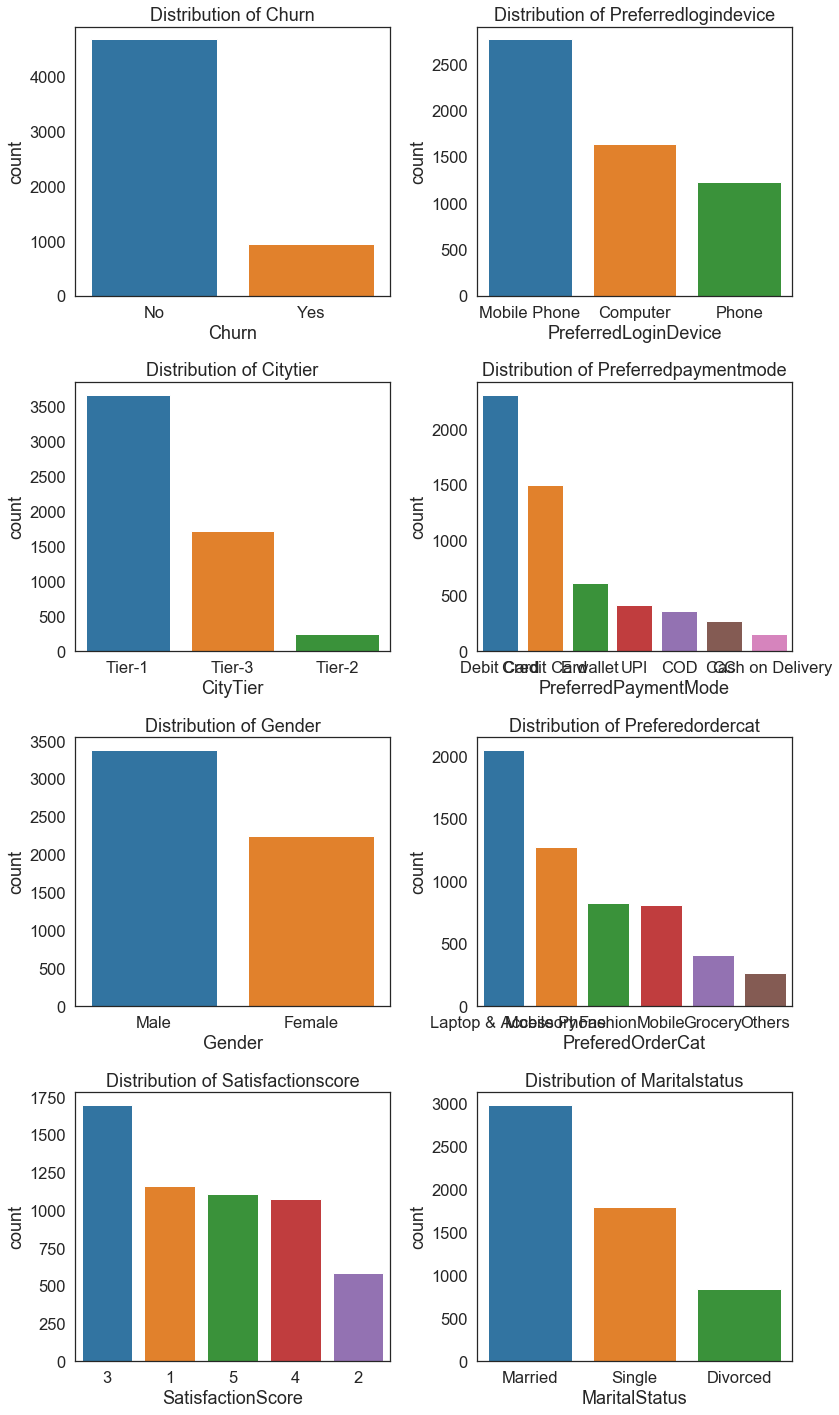

In [139]:
cat=['Churn' ,'PreferredLoginDevice', 'CityTier','PreferredPaymentMode', 'Gender','PreferedOrderCat', 'SatisfactionScore','MaritalStatus','Complain']
fig,ax=plt.subplots(4,2)
fig.set_size_inches(12,20)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.countplot(data_eda[col],order=data_eda[col].value_counts(normalize=True).index,ax=i)
    i.set_title("Distribution of "+col.title())
   # i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

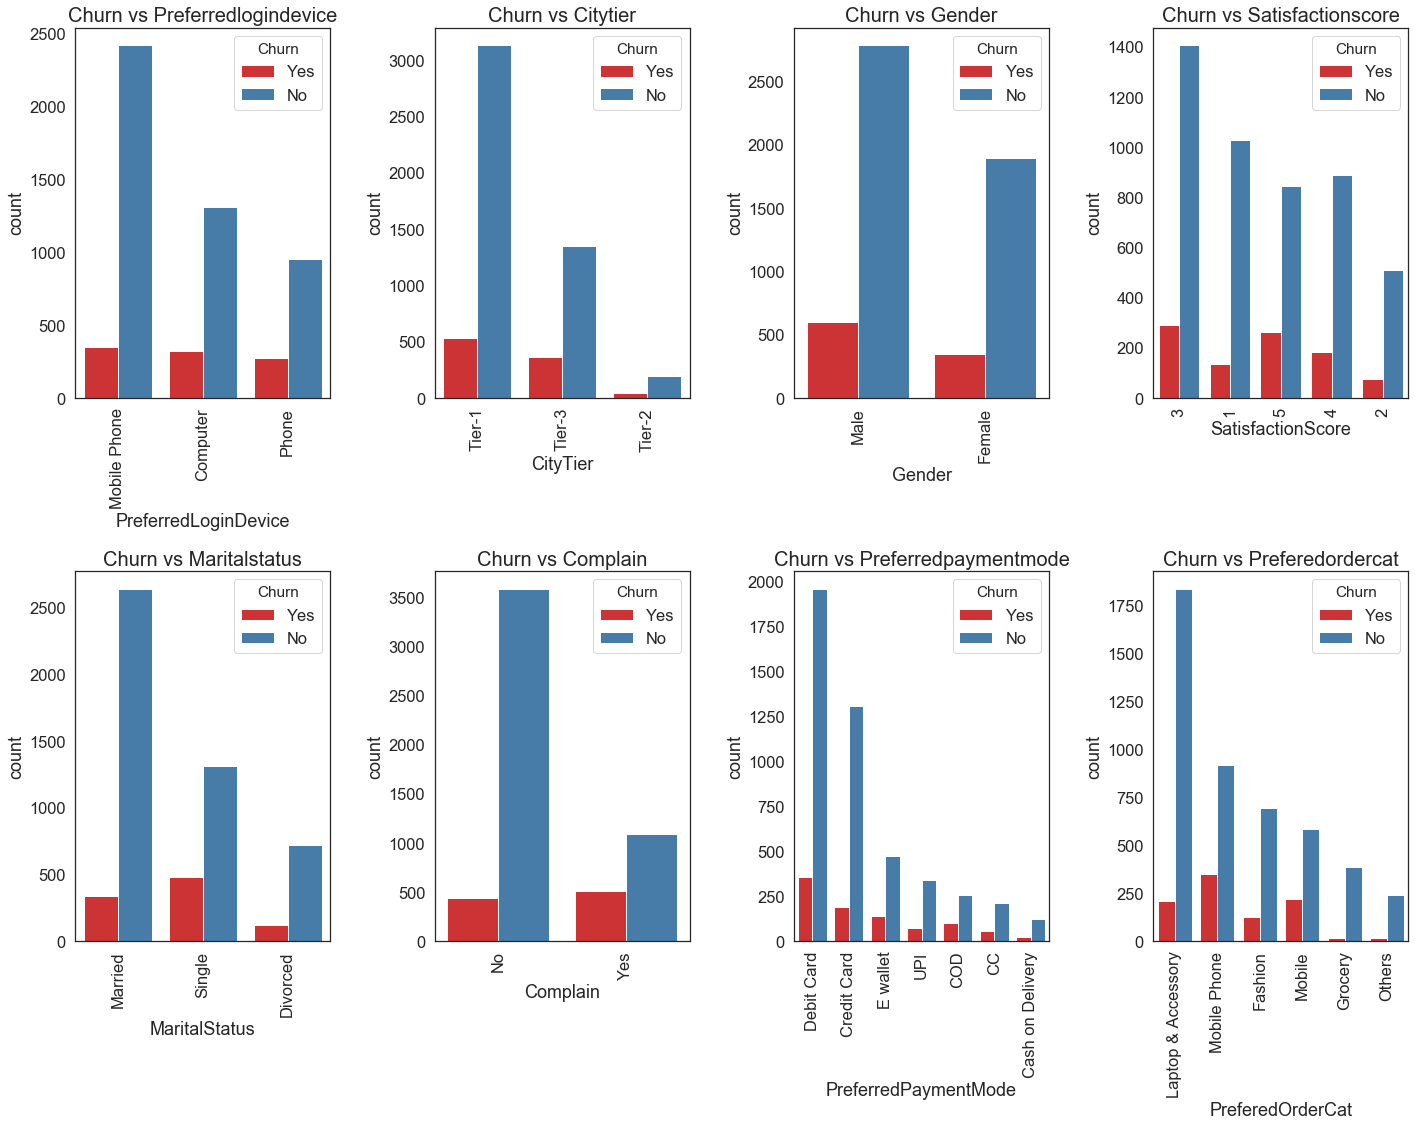

In [140]:
cat=['PreferredLoginDevice', 'CityTier', 'Gender', 'SatisfactionScore','MaritalStatus','Complain','PreferredPaymentMode','PreferedOrderCat']
fig,ax=plt.subplots(2,4)
fig.set_size_inches(20,16)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.countplot(data_eda[col],order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("Churn vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

In [141]:
for col in cat:
    print("Distribution by",col,"%")
    print((data_eda[col].value_counts(normalize=True)*100).round(2),'\n')

Distribution by PreferredLoginDevice %
Mobile Phone    49.11
Computer        29.02
Phone           21.87
Name: PreferredLoginDevice, dtype: float64 

Distribution by CityTier %
Tier-1    65.12
Tier-3    30.59
Tier-2     4.30
Name: CityTier, dtype: float64 

Distribution by Gender %
Male      60.11
Female    39.89
Name: Gender, dtype: float64 

Distribution by SatisfactionScore %
3    30.16
1    20.67
5    19.68
4    19.08
2    10.41
Name: SatisfactionScore, dtype: float64 

Distribution by MaritalStatus %
Married     53.04
Single      31.90
Divorced    15.06
Name: MaritalStatus, dtype: float64 

Distribution by Complain %
No     71.51
Yes    28.49
Name: Complain, dtype: float64 

Distribution by PreferredPaymentMode %
Debit Card          41.10
Credit Card         26.66
E wallet            10.91
UPI                  7.35
COD                  6.48
CC                   4.85
Cash on Delivery     2.65
Name: PreferredPaymentMode, dtype: float64 

Distribution by PreferedOrderCat %
Laptop & A

In [142]:
data_eda['HourSpendOnApp'] = data_eda['HourSpendOnApp'].apply(lambda x: 'Low Usage' 
                                                              if x<=2 else ('Medium Usage' if x>2 and x<4 else 'High Usage') )
data_eda['NumberOfDeviceRegistered'] = data_eda['NumberOfDeviceRegistered'].apply(lambda x: 'One or Two' 
                                                                                  if x <=3 else 'Three or more')
data_eda['NumberOfAddress'] = pd.cut(data_eda['NumberOfAddress'],
                                     [0,2,4,6,8,25],
                                     labels = ['Less than 2',' 2 to 4','4 to 6','6 to 8','8 plus'],right = True)
data_eda['CouponUsed'] = data_eda['CouponUsed'].apply(lambda x: 'Less than 3' 
                                                      if x<3 else ('3 to 8' if x >=3 and x<8 else '8 plus')) 
data_eda['OrderCount'] = pd.cut(data_eda['OrderCount'],[0,3,6,10,18],
                               right = True,
                               labels = ['Less than 3',
                                        '3 to 6','6 to 10','10 plus'])
data_eda.OrderCount=data_eda.OrderCount.astype('object')
data_eda.NumberOfAddress=data_eda.CouponUsed.astype('object')

In [143]:
cat=data_eda.columns[data_eda.dtypes=='object']
cat

Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount'],
      dtype='object')

In [144]:
len(cat)

14

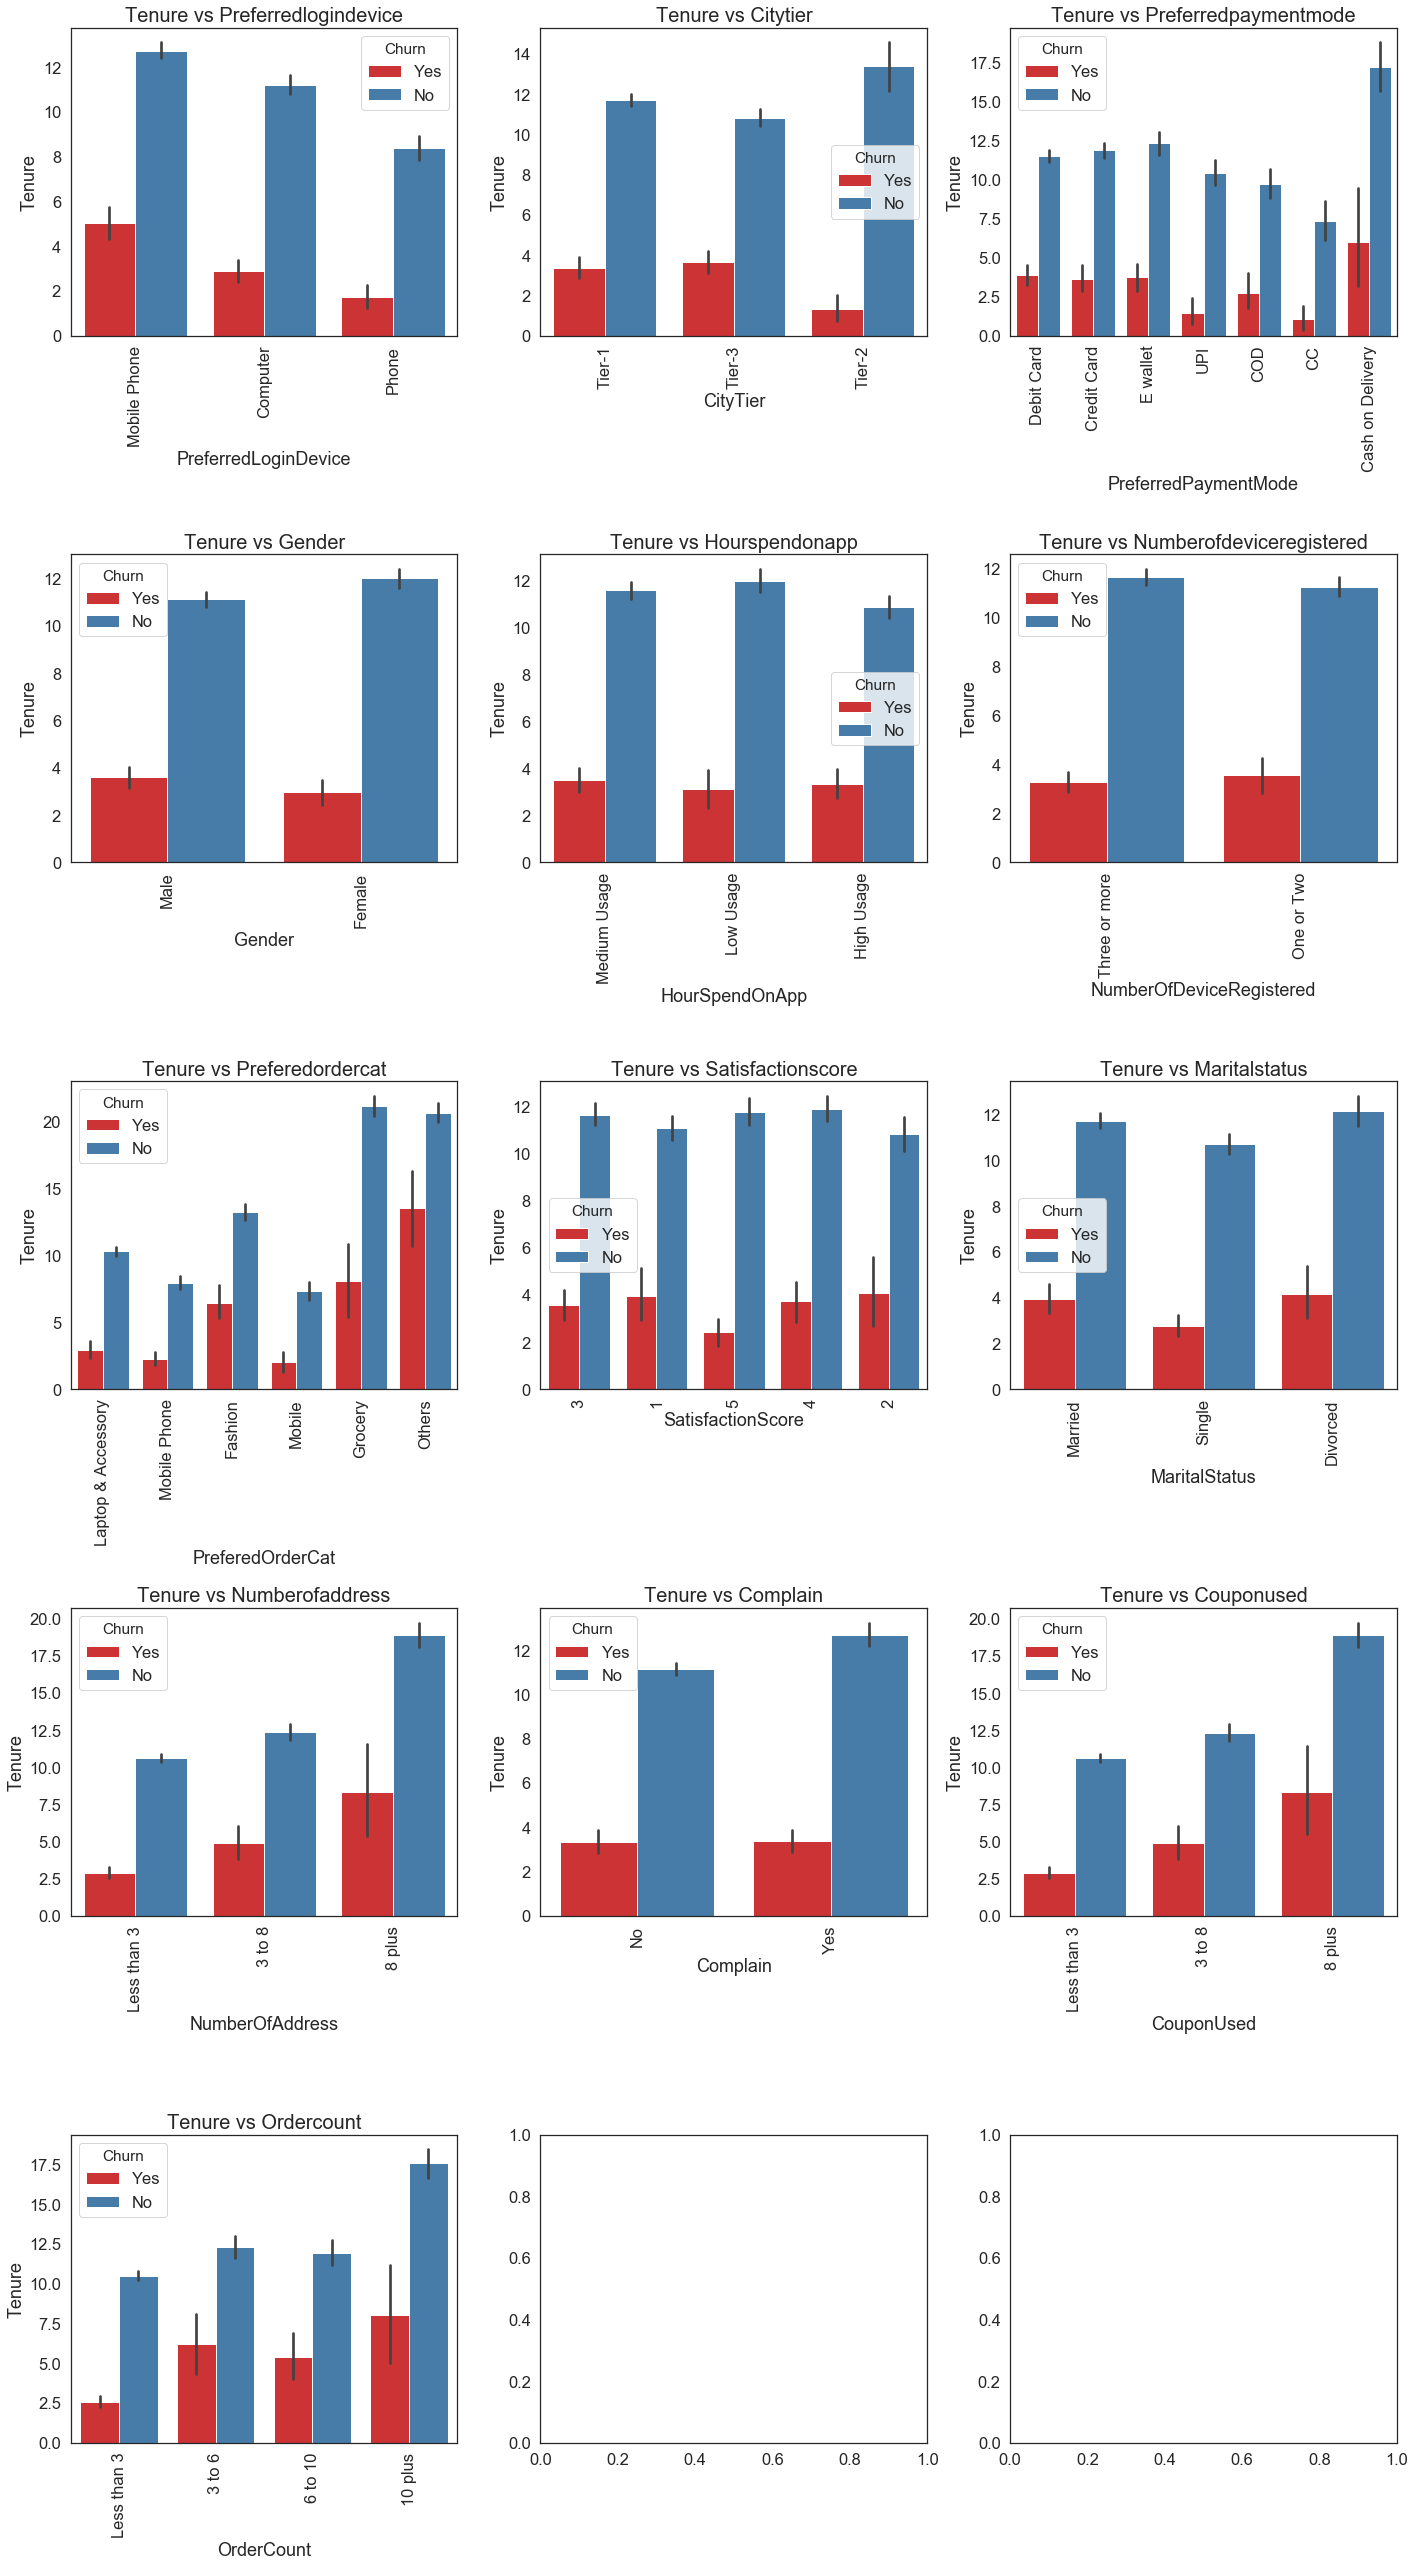

In [145]:
cat=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount']
fig,ax=plt.subplots(5,3)
fig.set_size_inches(20,36)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.barplot(data_eda[col],data_eda.Tenure,order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("Tenure vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

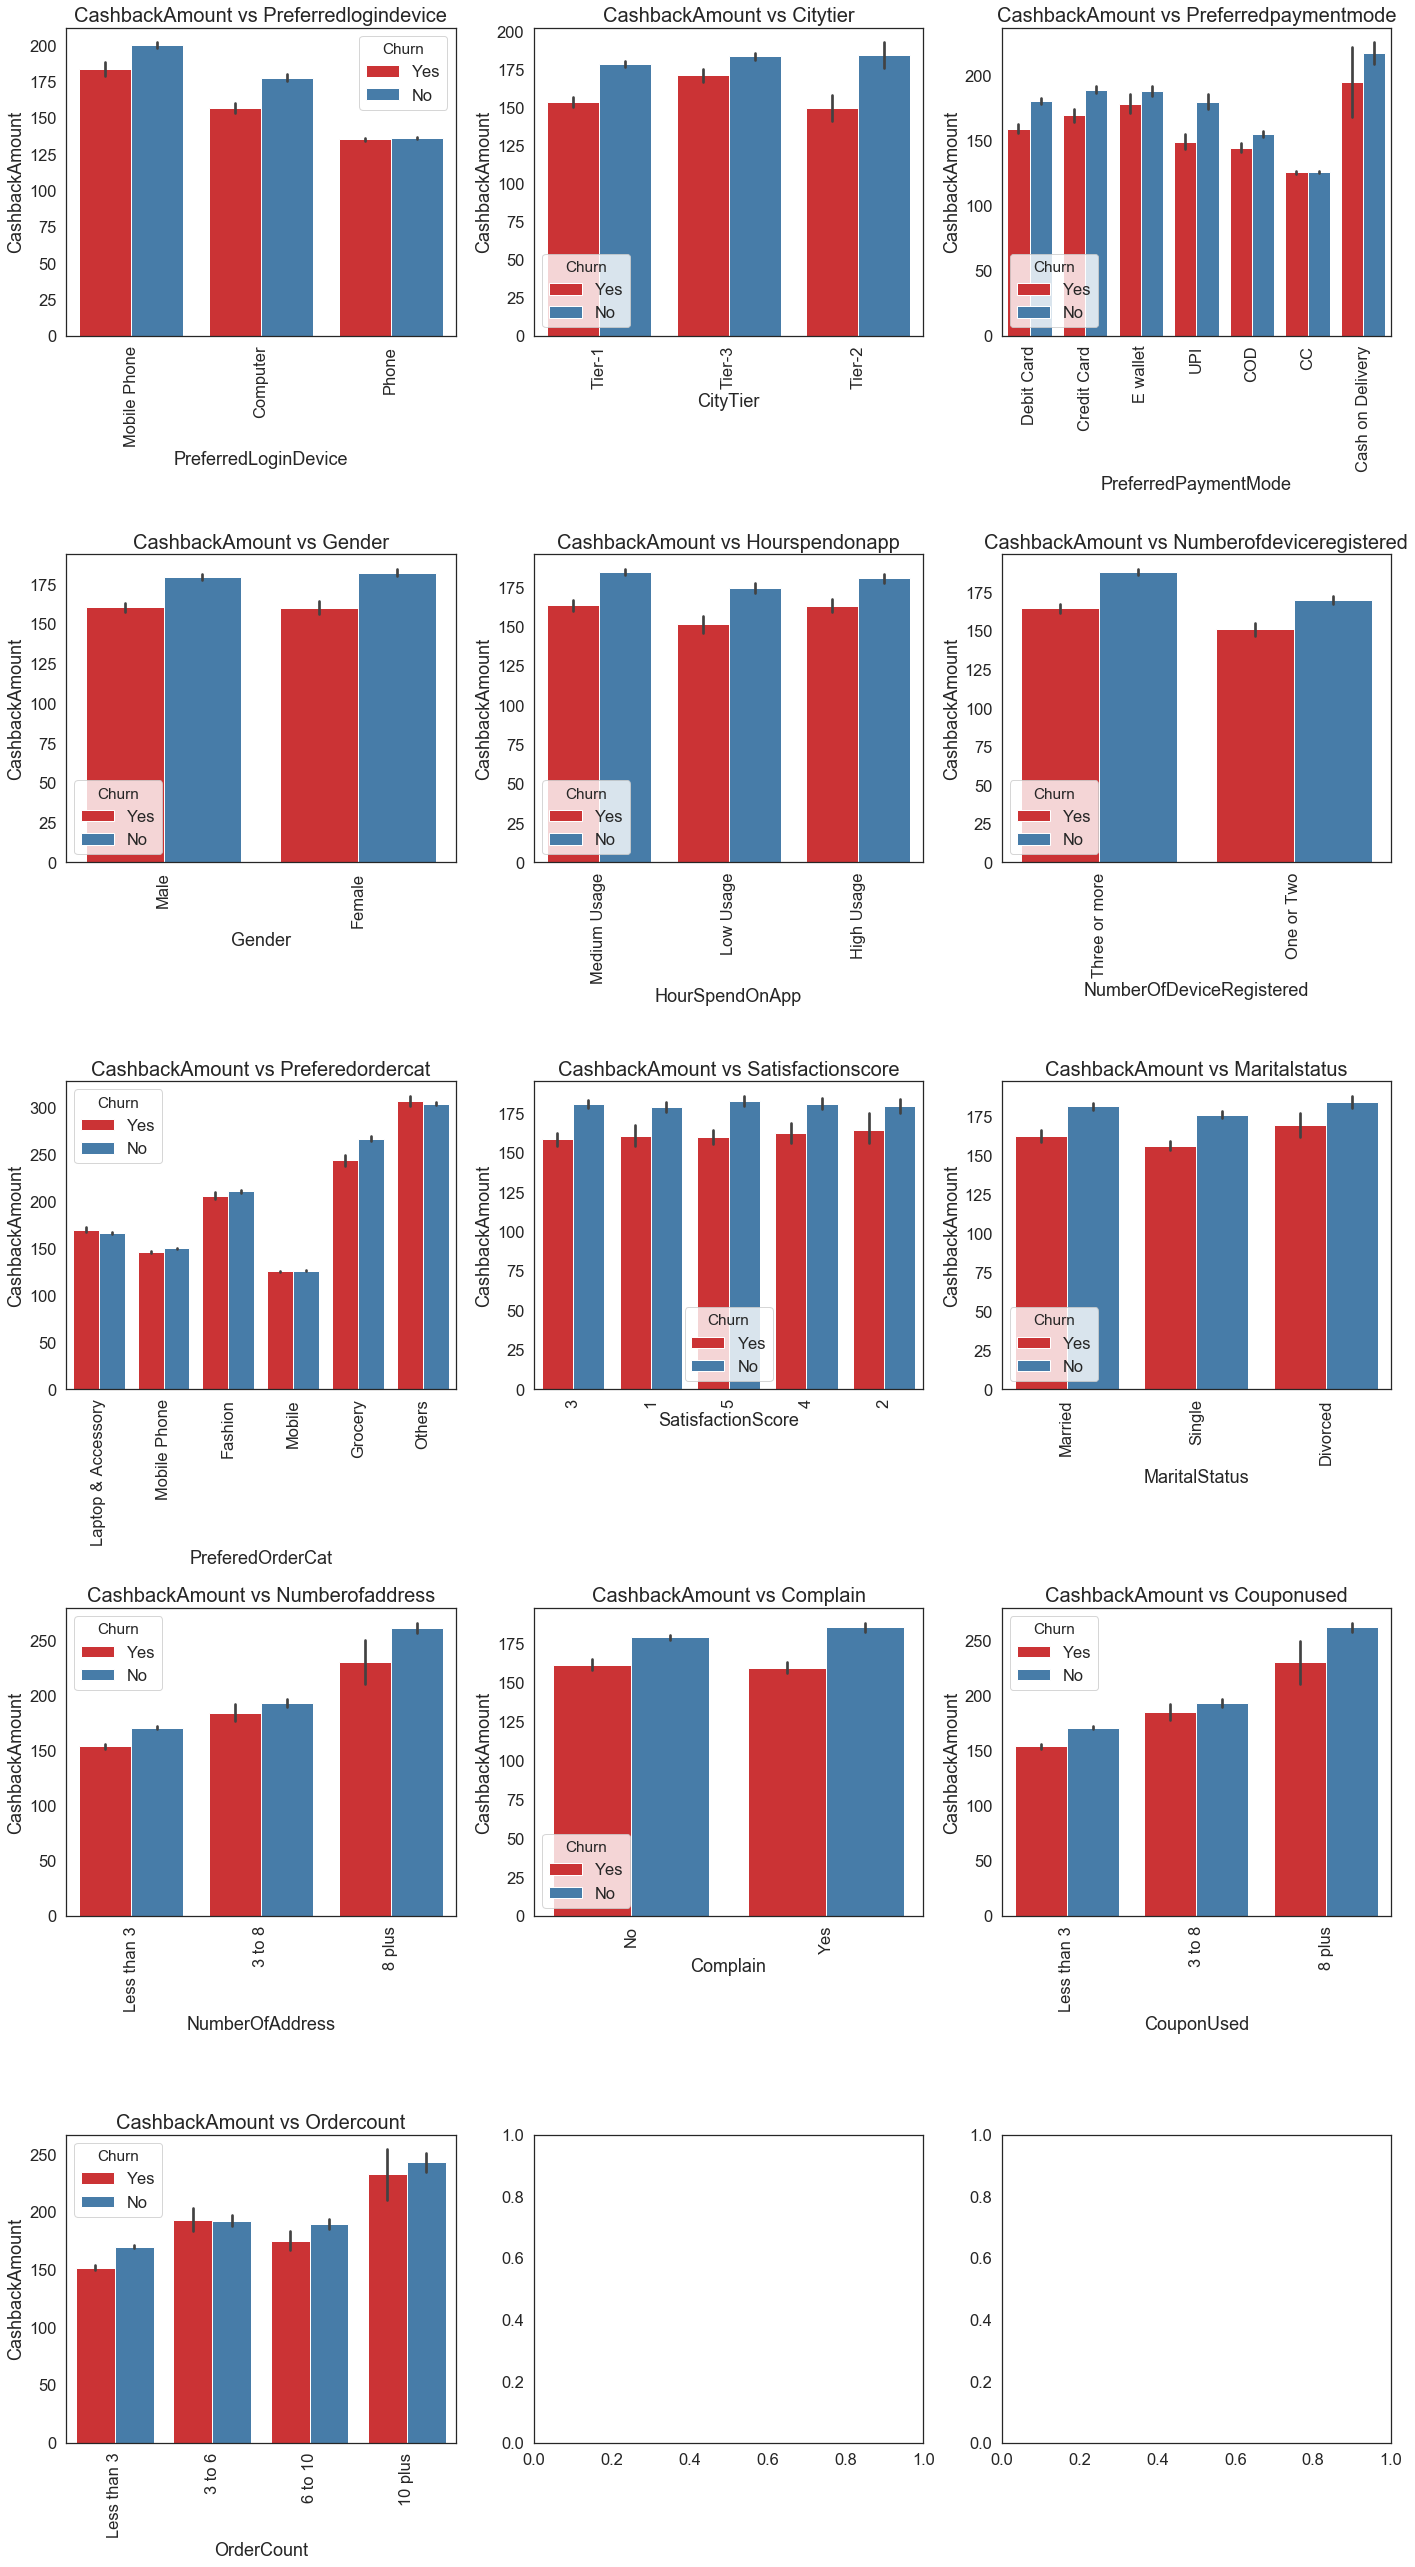

In [117]:
cat=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount']
fig,ax=plt.subplots(5,3)
fig.set_size_inches(20,36)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.barplot(data_eda[col],data_eda.CashbackAmount,order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("CashbackAmount vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

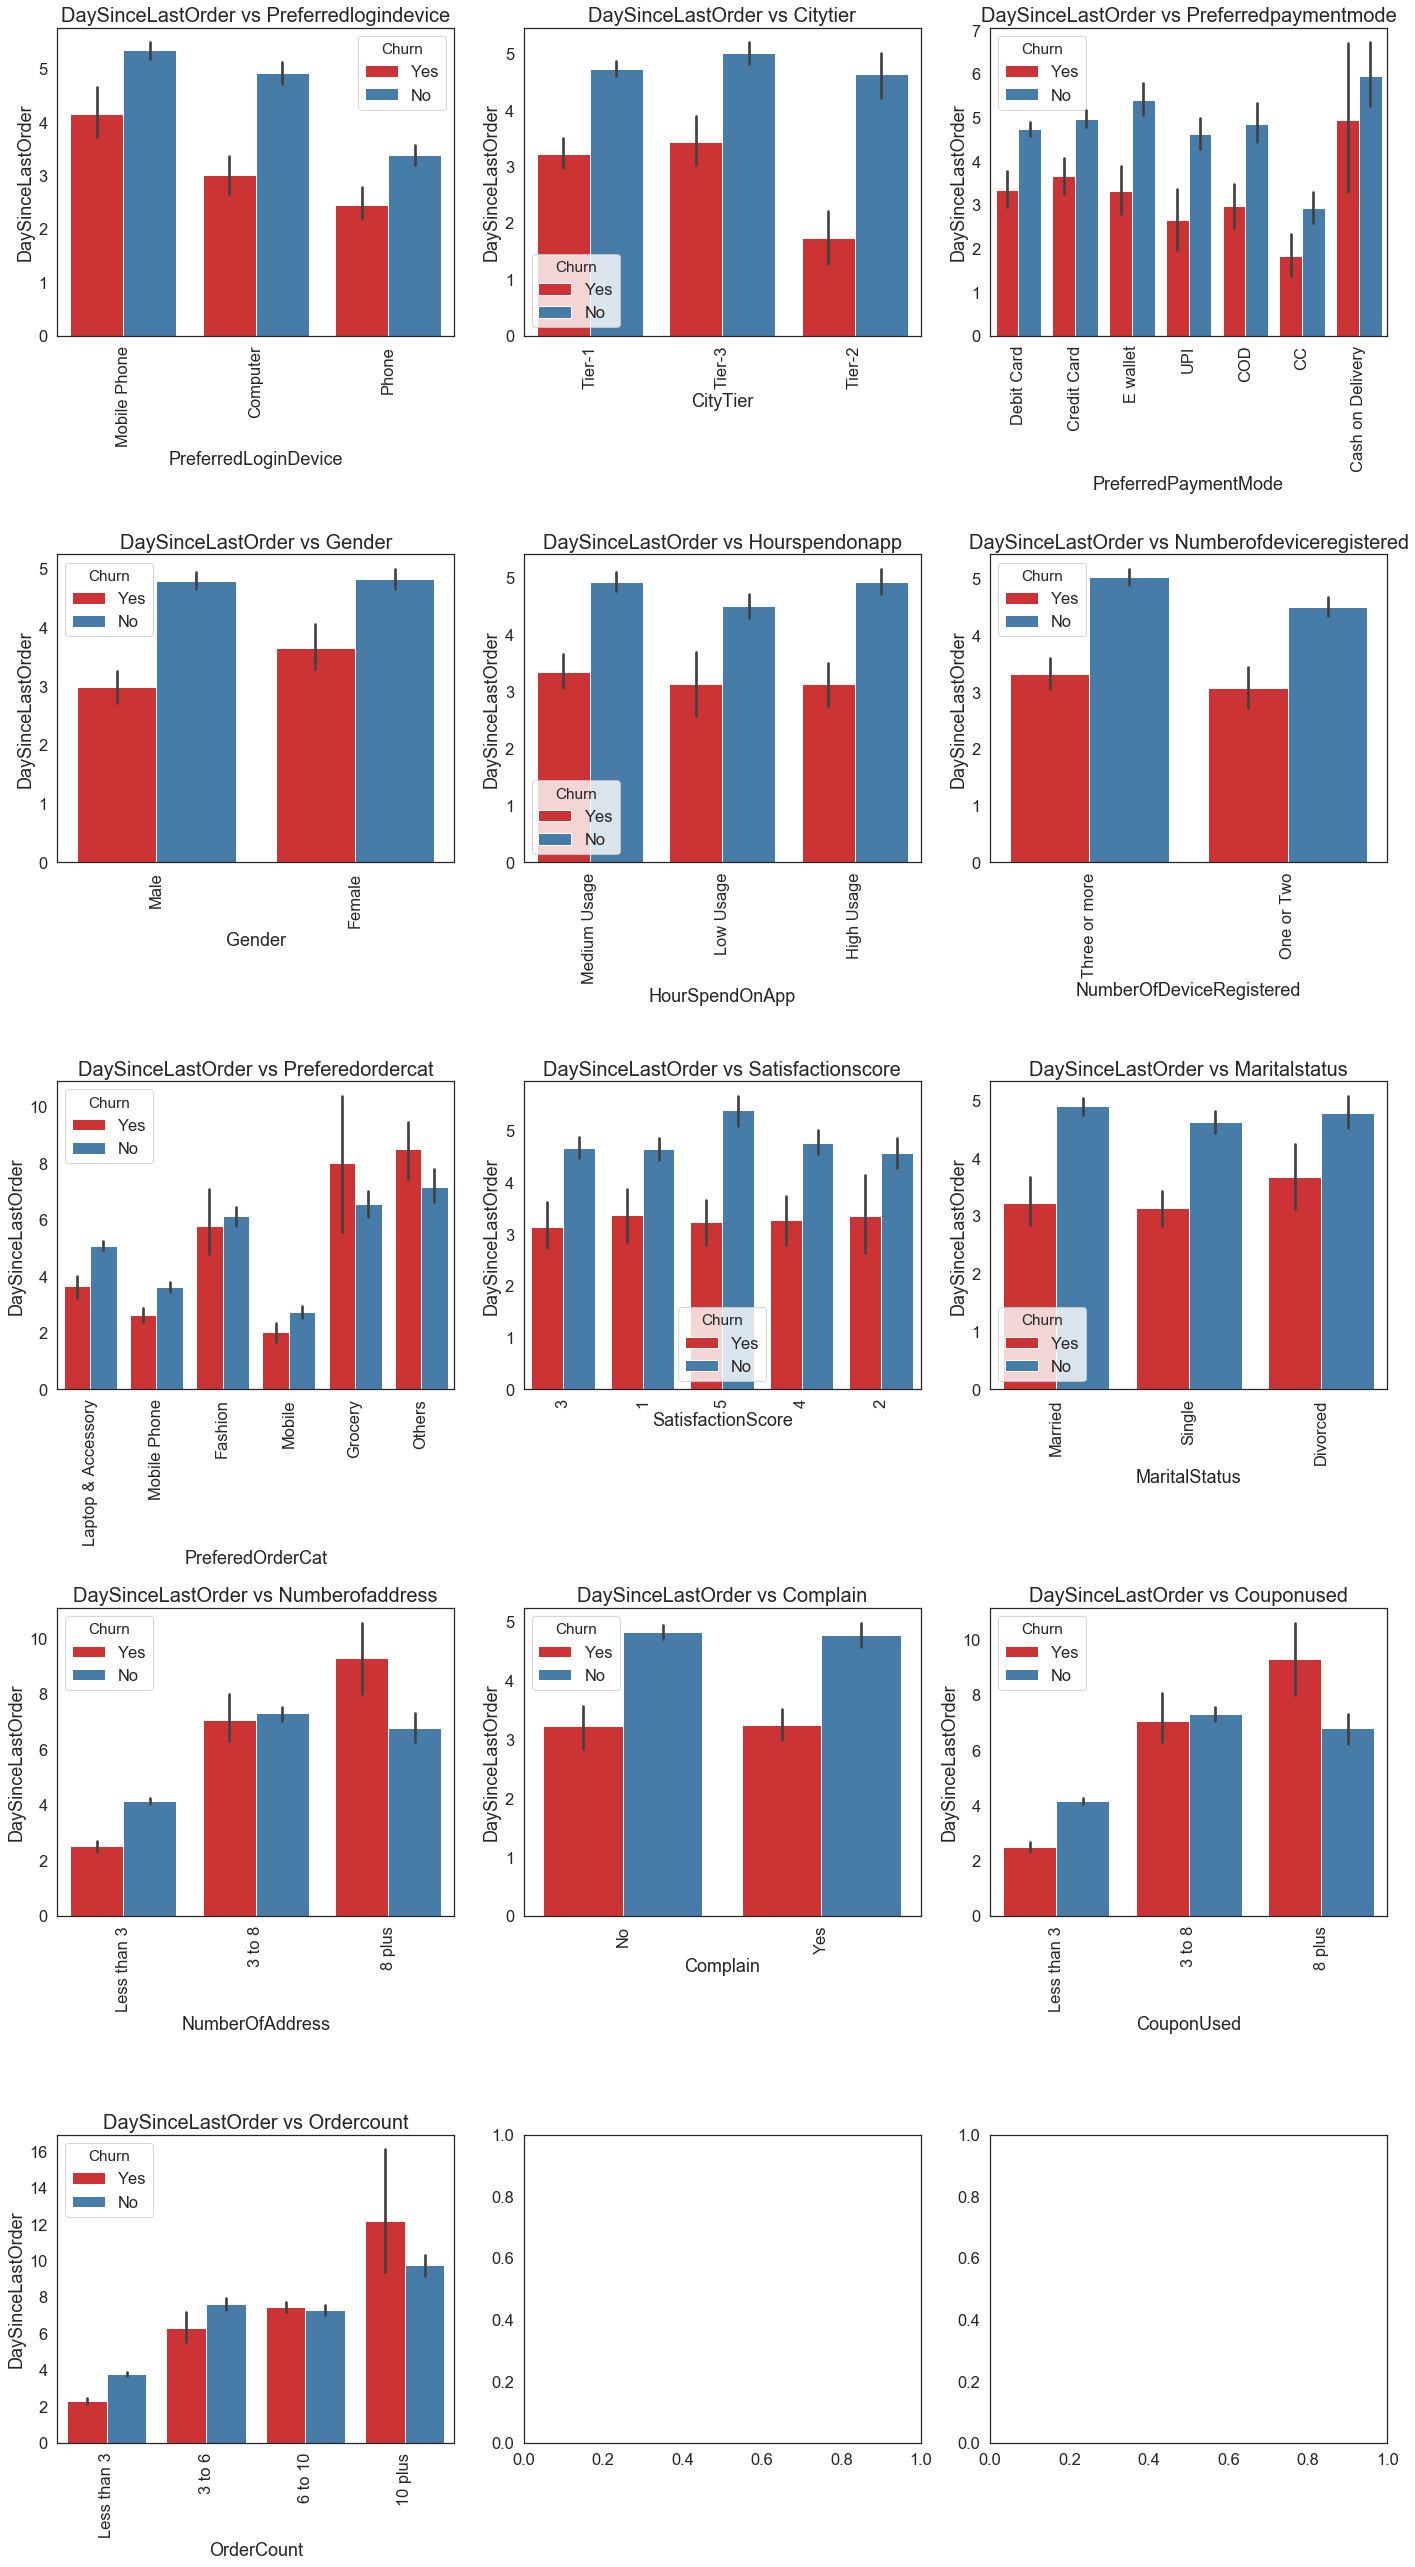

In [146]:
cat=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount']
fig,ax=plt.subplots(5,3)
fig.set_size_inches(20,36)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.barplot(data_eda[col],data_eda.DaySinceLastOrder,order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("DaySinceLastOrder vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

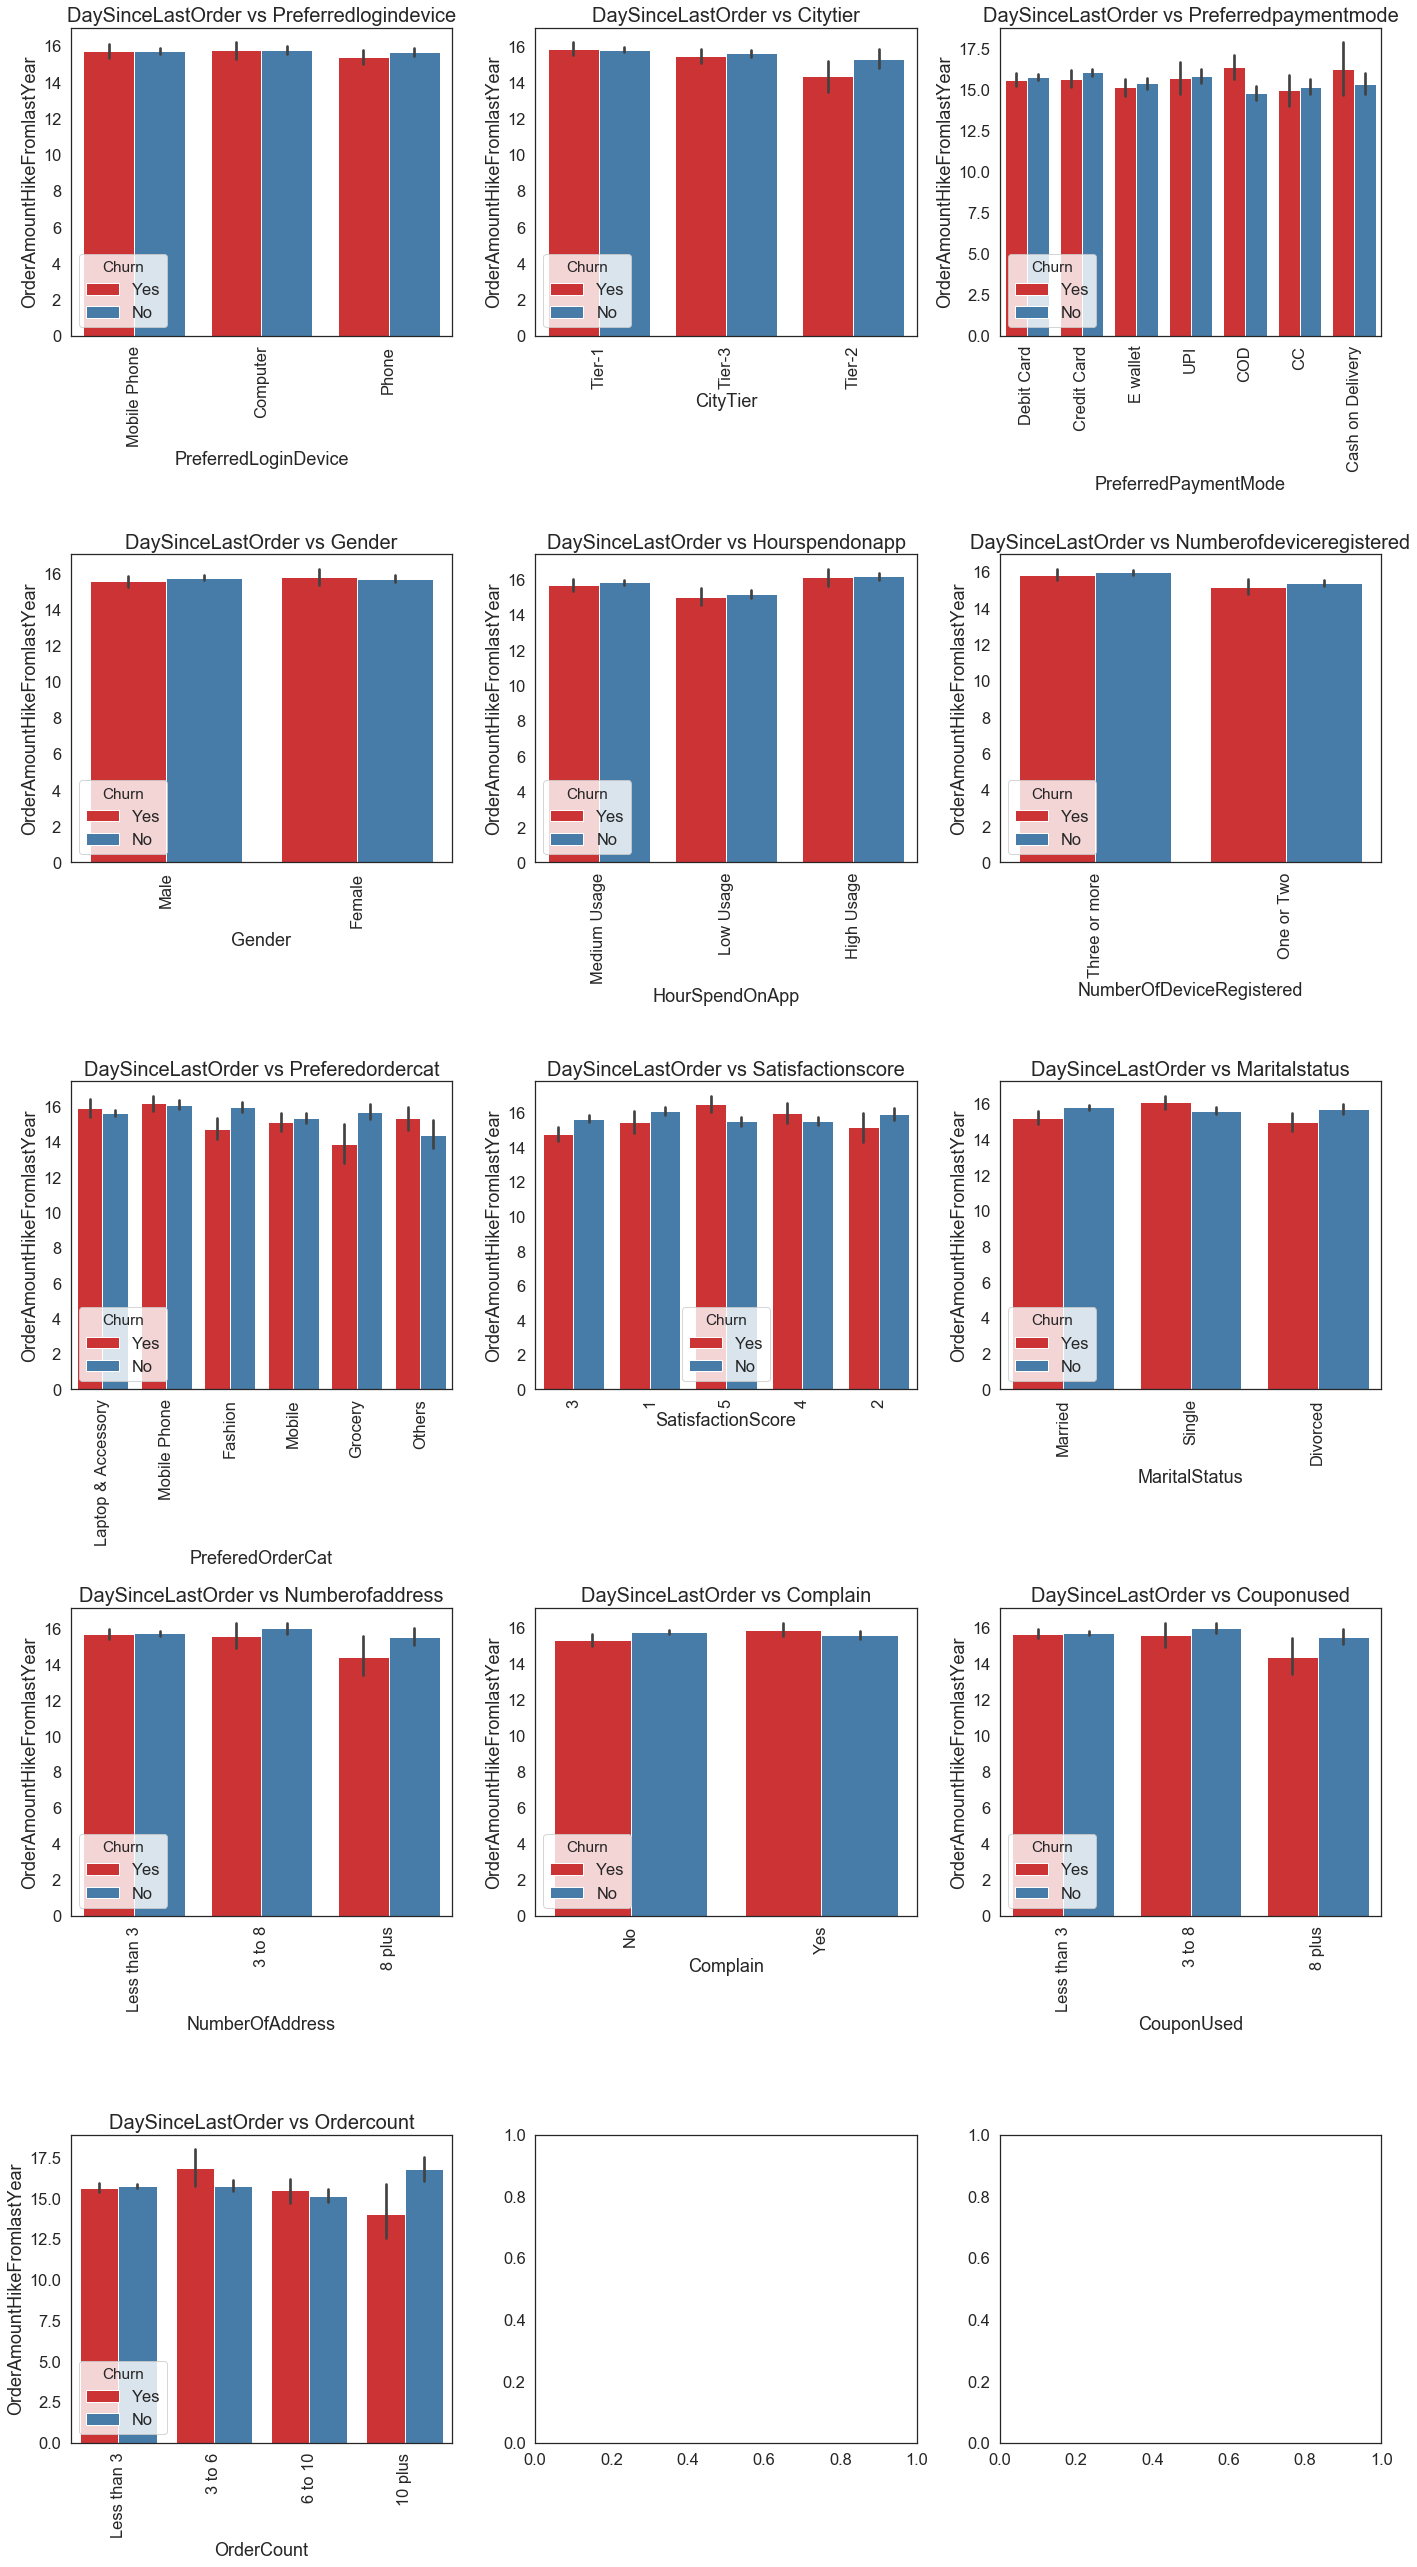

In [147]:
cat=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount']
fig,ax=plt.subplots(5,3)
fig.set_size_inches(20,36)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.barplot(data_eda[col],data_eda.OrderAmountHikeFromlastYear,order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("DaySinceLastOrder vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

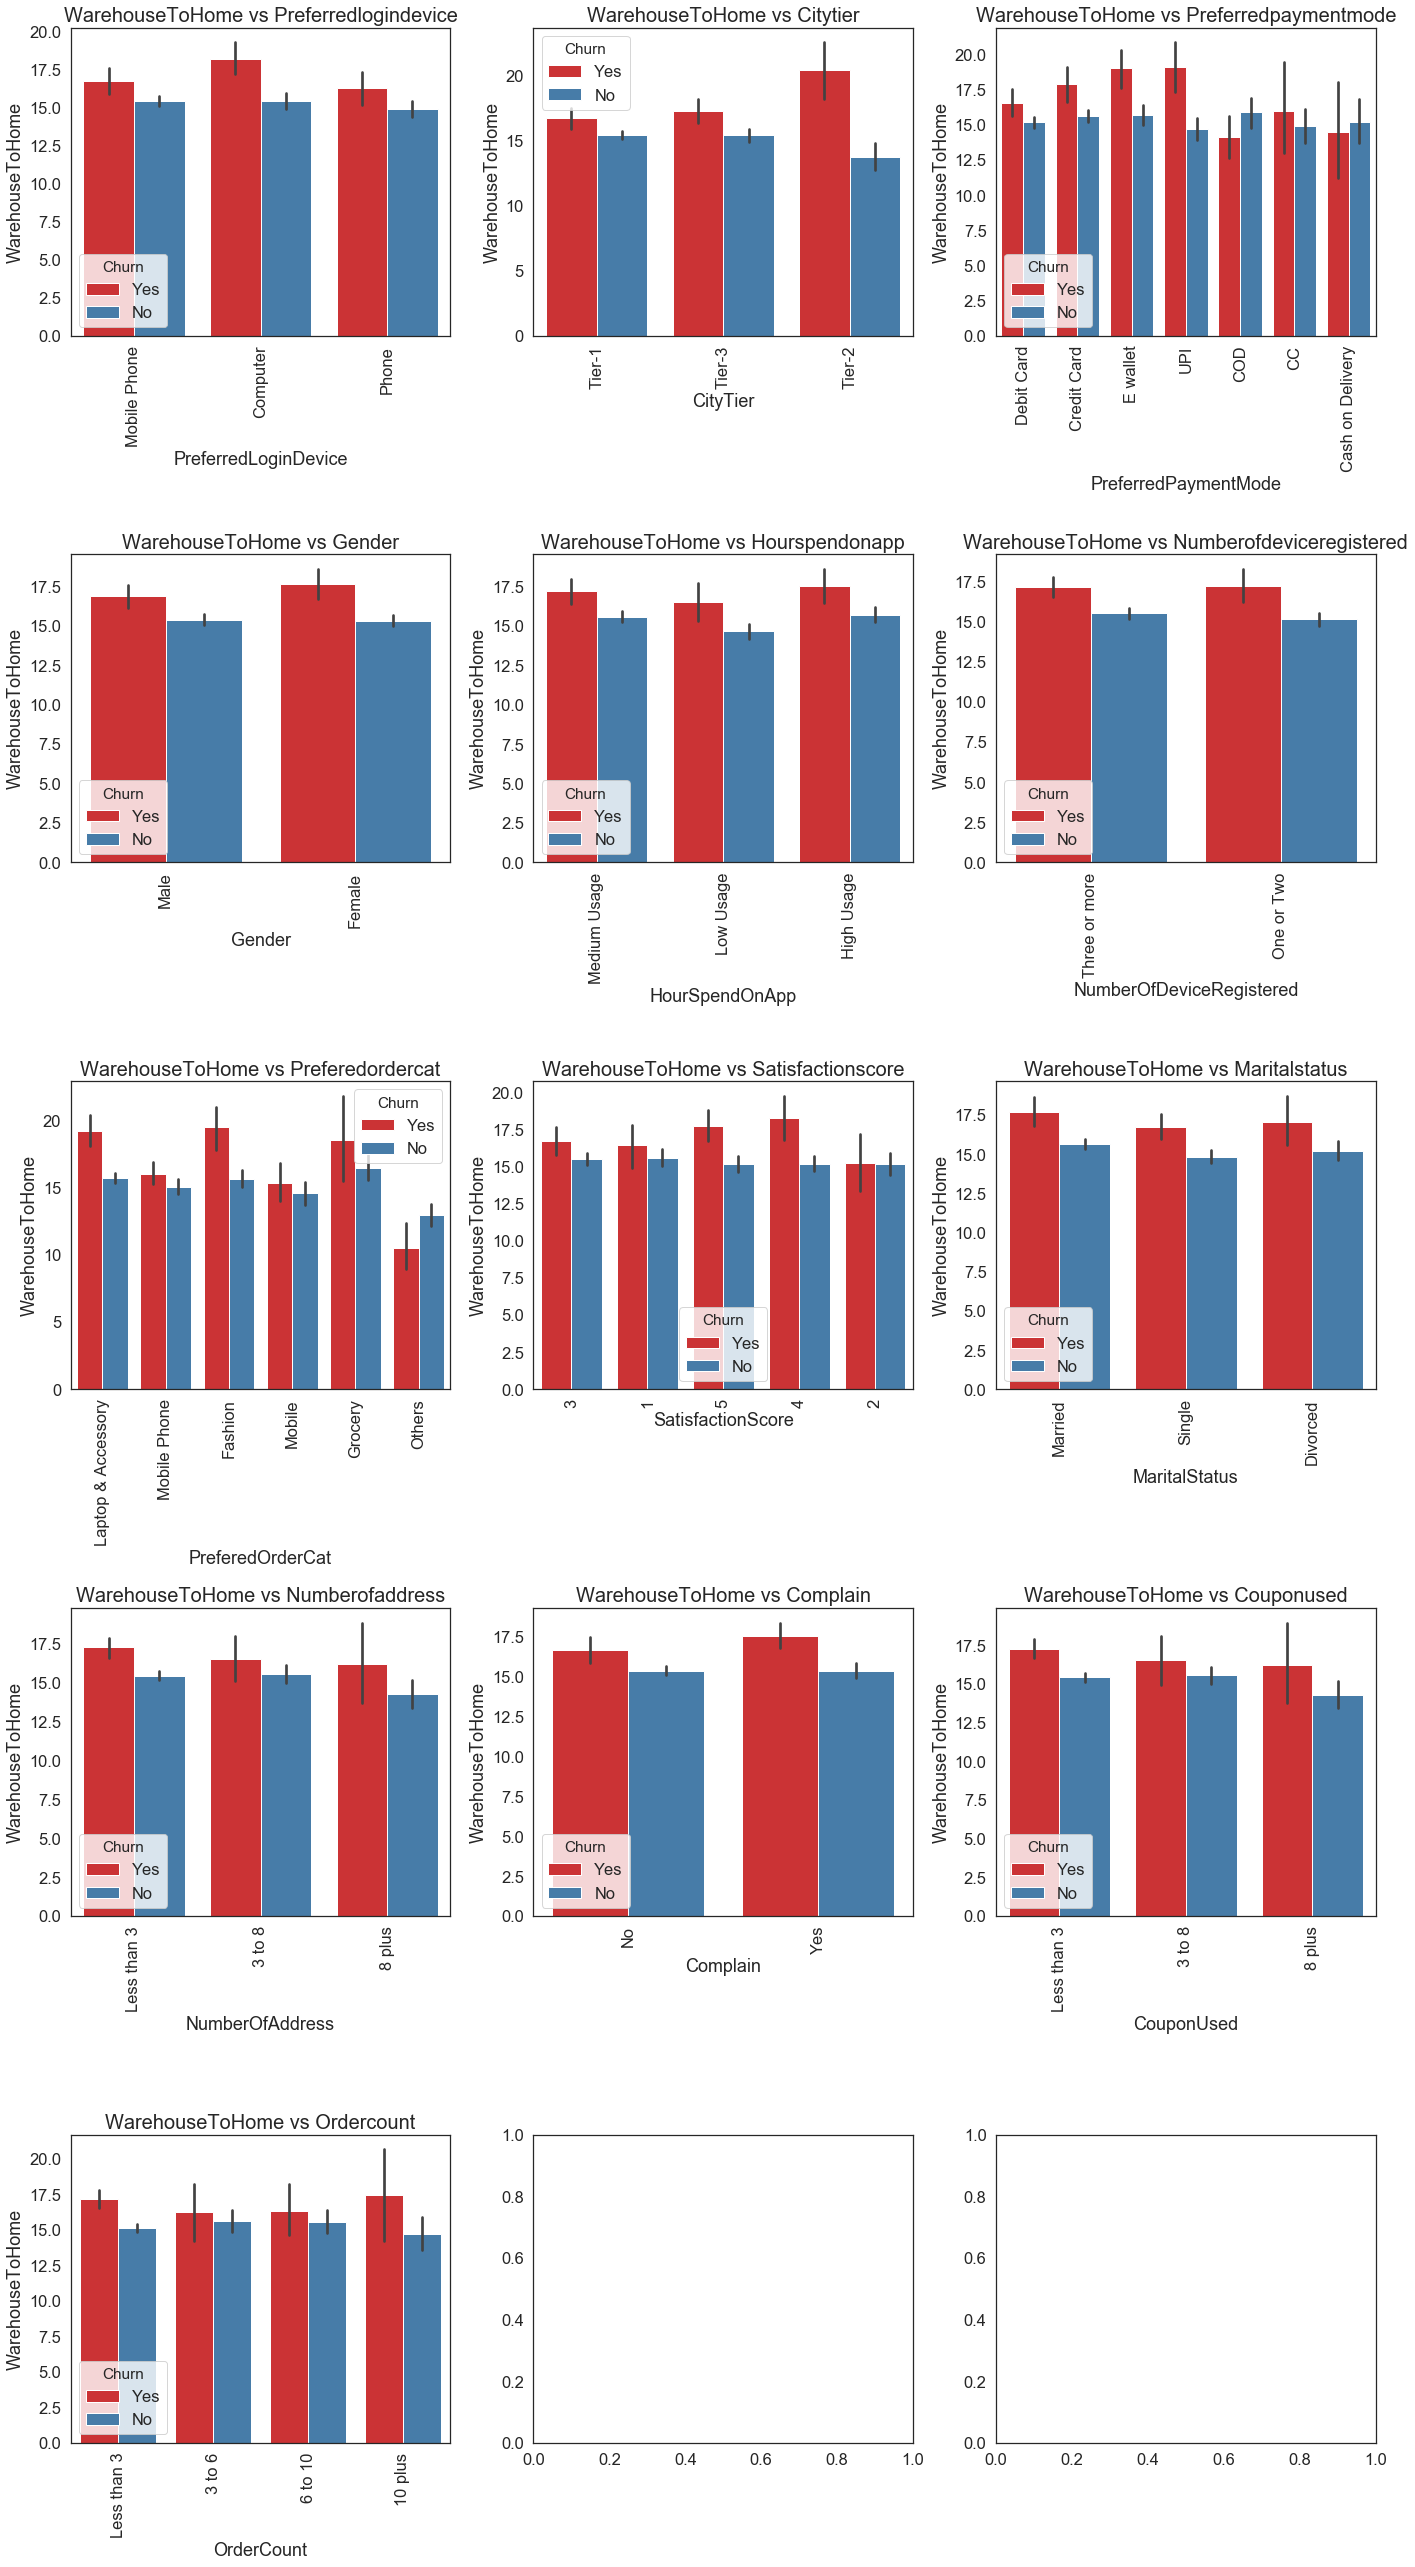

In [148]:
cat=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'CouponUsed', 'OrderCount']
fig,ax=plt.subplots(5,3)
fig.set_size_inches(20,36)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.barplot(data_eda[col],data_eda.WarehouseToHome,order=data_eda[col].value_counts(normalize=True).index,ax=i,hue=data_eda.Churn,palette='Set1')
    i.set_title("WarehouseToHome vs "+col.title(),fontsize=20)
    i.set_xticklabels(data_eda[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

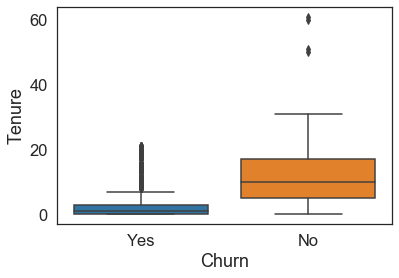

In [149]:
sns.boxplot(data_eda.Churn,data_eda.Tenure)

#24% no complain churned

#Different churn rate for both
data.PreferredLoginDevice=data.PreferredLoginDevice.str.replace('^Phone$','Mobile Phone')

#Check for Churn rate before combining categories. See is there is difference(may be different customers)
data.PreferredPaymentMode=data.PreferredPaymentMode.str.replace('CC','Credit Card')


#Highly satisfied customer, No Complain Churn rate is 7%.
#Not satisfied customer No Complain churn rate =18&, complain -churn rate is 37% two times

#Less than 1% customers have CouponUsed greater than 9.Since we are not able to distinctively identify churn with Coupon used even for higher values , I replaced CouponUsed >10 with 10.

#can use linear regression to impute order count and Coupon used
#remove order count=0 from model

In [150]:
data_eda.describe(include='object').T

count unique                 top  freq
Churn                     5630      2                  No  4682
PreferredLoginDevice      5630      3        Mobile Phone  2765
CityTier                  5630      3              Tier-1  3666
PreferredPaymentMode      5630      7          Debit Card  2314
Gender                    5630      2                Male  3384
HourSpendOnApp            5630      3        Medium Usage  2687
NumberOfDeviceRegistered  5630      2       Three or more  3420
PreferedOrderCat          5630      6  Laptop & Accessory  2050
SatisfactionScore         5630      5                   3  1698
MaritalStatus             5630      3             Married  2986
NumberOfAddress           5630      3         Less than 3  4418
Complain                  5630      2                  No  4026
CouponUsed                5630      3         Less than 3  4418
OrderCount                5372      4         Less than 3  4147

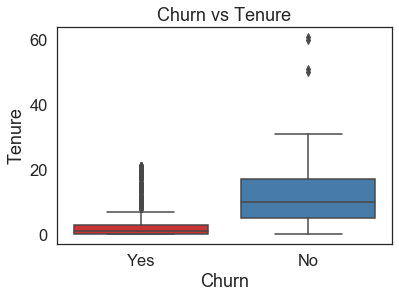

In [104]:
plt.title('Churn vs Tenure')
sns.boxplot(data_eda.Churn,data_eda.Tenure,palette='Set1')

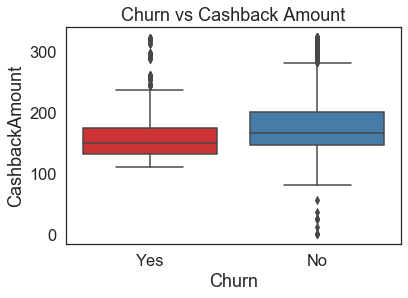

In [105]:
plt.title('Churn vs Cashback Amount')
sns.boxplot(data_eda.Churn,data_eda.CashbackAmount,palette='Set1')

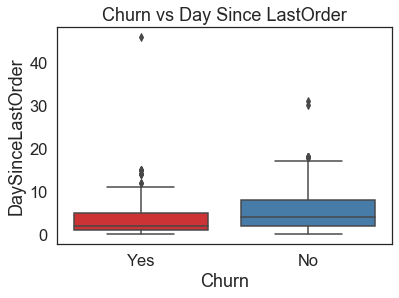

In [109]:
plt.title('Churn vs Day Since LastOrder')
sns.boxplot(data_eda.Churn,data_eda.DaySinceLastOrder,palette='Set1')

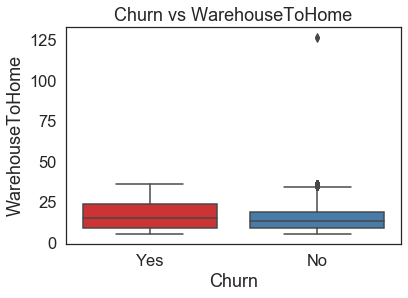

In [108]:
plt.title('Churn vs WarehouseToHome')
sns.boxplot(data_eda.Churn,data_eda.WarehouseToHome,palette='Set1')

(0, 30)

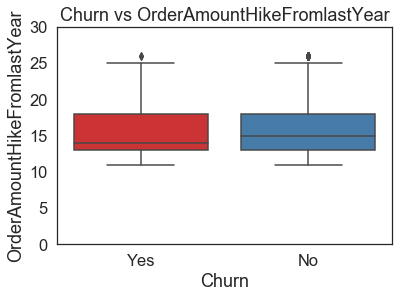

In [123]:
plt.title('Churn vs OrderAmountHikeFromlastYear')
sns.boxplot(data_eda.Churn,data_eda.OrderAmountHikeFromlastYear,palette='Set1')
plt.ylim(0,30)

In [124]:
data_eda[['OrderAmountHikeFromlastYear','Churn']].groupby('Churn').describe()

OrderAmountHikeFromlastYear                                         \
                            count       mean       std   min   25%   50%   
Churn                                                                      
No                         4431.0  15.724893  3.646256  11.0  13.0  15.0   
Yes                         934.0  15.627409  3.812084  11.0  13.0  14.0   

                   
        75%   max  
Churn              
No     18.0  26.0  
Yes    18.0  26.0

Text(0.5, 1.0, 'Tenure vs Cashback')

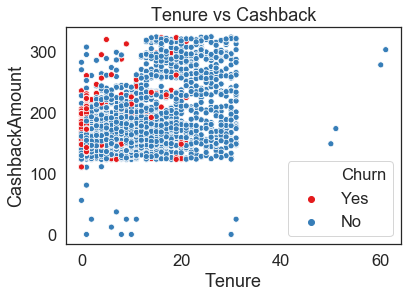

In [112]:
sns.scatterplot(data_eda.Tenure,data_eda.CashbackAmount,hue=data_eda.Churn,palette='Set1')
plt.title('Tenure vs Cashback')

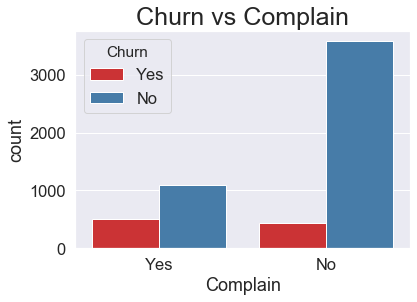

In [35]:
plt.title('Churn vs Complain',fontsize=25)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

sns.countplot(data_eda.Complain,hue=data_eda.Churn,palette='Set1')

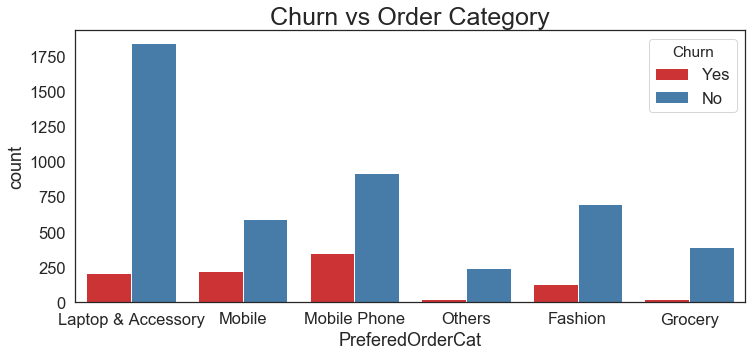

In [151]:
plt.figure(figsize=(12,5))
plt.title('Churn vs Order Category',fontsize=25)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

sns.countplot(data_eda.PreferedOrderCat,hue=data_eda.Churn,palette='Set1')

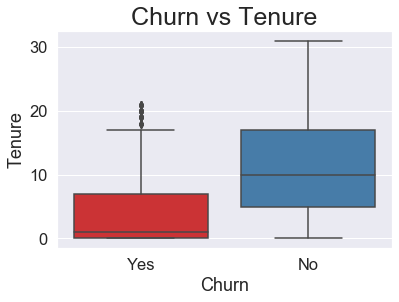

In [37]:
plt.title('Churn vs Tenure',fontsize=25)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

sns.boxplot(data_eda.Churn,data_eda.Tenure,palette='Set1',data=data_eda[data_eda.PreferedOrderCat=='Mobile Phone'])

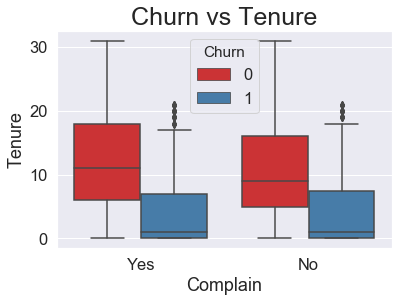

In [38]:
plt.title('Churn vs Tenure',fontsize=25)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

sns.boxplot(data_eda.Complain,data_eda.Tenure,palette='Set1',data=data_eda[data_eda.PreferedOrderCat=='Mobile Phone'],hue=data.Churn)

In [30]:
data_eda[data_eda.Churn=='Yes'].describe(include='object')

Churn PreferredLoginDevice CityTier PreferredPaymentMode Gender  \
count    945                  945      945                  945    945   
unique     1                    3        3                    6      2   
top      Yes         Mobile Phone   Tier-1           Debit Card   Male   
freq     945                  347      530                  355    597   

       PreferedOrderCat MaritalStatus Complain  
count               945           945      945  
unique                5             3        2  
top        Mobile Phone        Single      Yes  
freq                568           478      506

In [152]:
data.PreferredPaymentMode=data.PreferredPaymentMode.str.replace('COD','Cash on Delivery')
data.PreferedOrderCat=data.PreferedOrderCat.str.replace('^Mobile$','Mobile Phone')
data.PreferredPaymentMode=data.PreferredPaymentMode.str.replace('CC','Credit Card')



In [153]:
#Dropping extreme outliers
data.drop(data[data.NumberOfAddress>15].index,inplace=True)#Drop outliers in original data.
data.NumberOfAddress=np.where(data.NumberOfAddress>10,10,data.NumberOfAddress)

data=data.drop(data[data.Tenure>40].index)

data.drop(data[data.WarehouseToHome>100].index,inplace=True)
#Excluding outliers max value in WarehouseToHome for Tier 3/Tier 1 city is 36. 
#I considered this as wrong data and dropped outliers.

#Less than 1% customers have CouponUsed greater than 9.Since we are not able to distinctively identify churn with Coupon used even for higher values , I replaced CouponUsed >10 with 10.
data.CouponUsed=np.where(data.CouponUsed>10,10,data.CouponUsed)

data.drop(data[data.DaySinceLastOrder>=30].index,inplace=True)

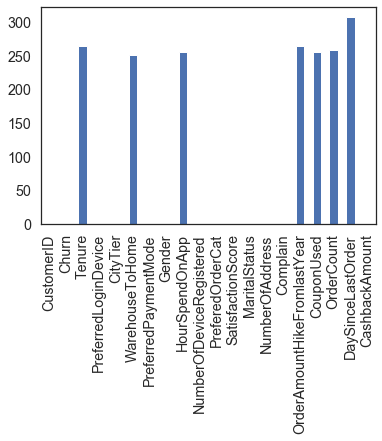

In [191]:
sns.set(font_scale=1.3)
sns.set_style(style='white')
data.isnull().sum().plot(kind='bar')

In [155]:
data.Tenure=data.Tenure.fillna(data.Tenure.median())
data.WarehouseToHome=data.WarehouseToHome.fillna(data.WarehouseToHome.median())
data.HourSpendOnApp=data.HourSpendOnApp.fillna(data.HourSpendOnApp.median())
data.OrderAmountHikeFromlastYear=data.OrderAmountHikeFromlastYear.fillna(data.OrderAmountHikeFromlastYear.median())
data.CouponUsed=data.CouponUsed.fillna(data.CouponUsed.median())
data.OrderCount=data.OrderCount.fillna(data.OrderCount.median())
data.DaySinceLastOrder=data.DaySinceLastOrder.fillna(data.DaySinceLastOrder.median())

In [157]:
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

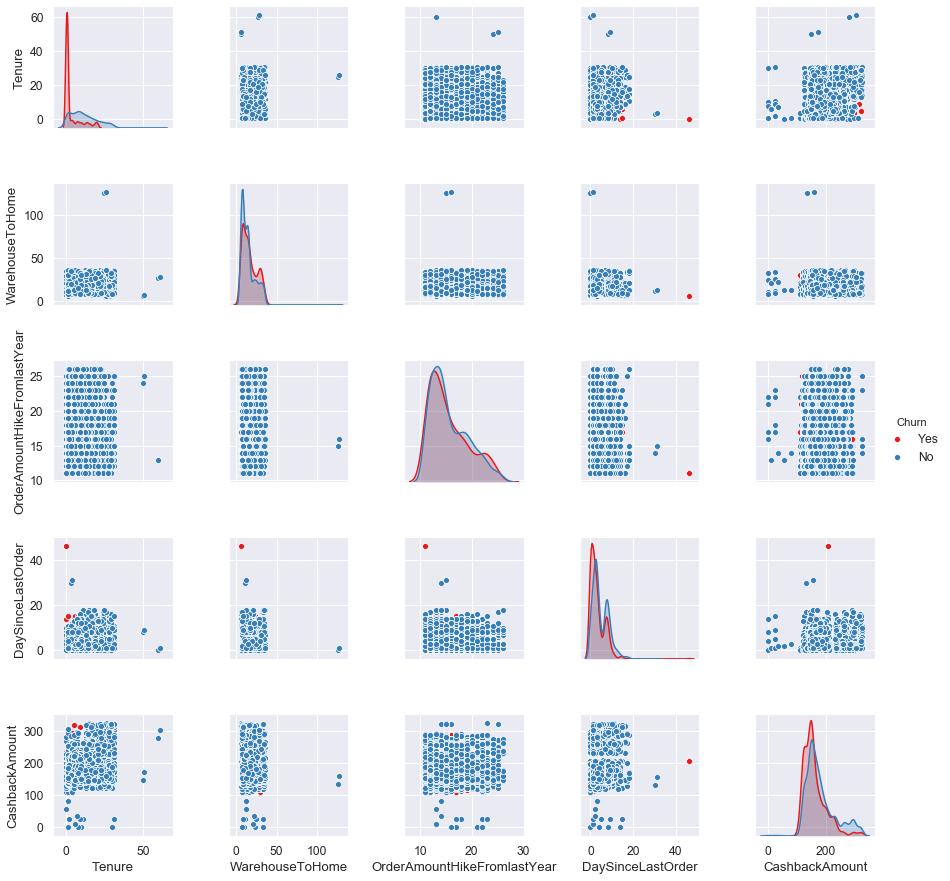

In [173]:
sns.set(font_scale=1.1)
sns.pairplot(data_eda[['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn']],hue = 'Churn',palette='Set1')
plt.savefig('pairplot.jpg')

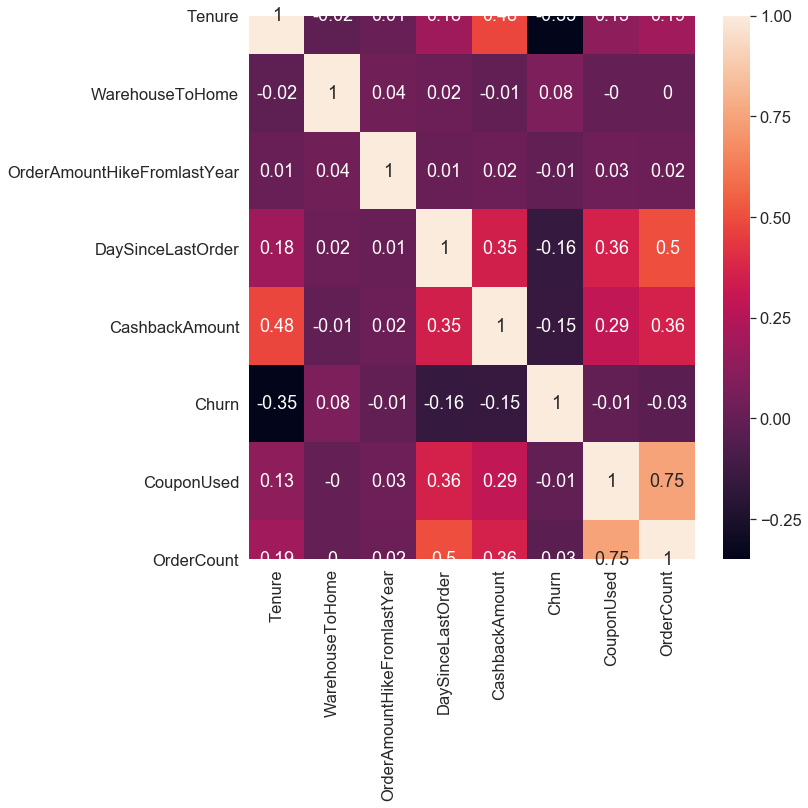

In [188]:
plt.figure(figsize=(10,10))
sns.heatmap(data[['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn','CouponUsed','OrderCount']].corr().round(2),annot=True)
plt.savefig('Heatmap.jpg')

Complain is higher for people who churned
Avg tenure is high for customers not churned

75% customers who churned were with us less than 3 months

Churned customers - 53% complains
not much difference in order count distribution & cashback amount


#Single people have higher churn rate

#For Mobile and Mobile Phone Churn rate is also same. so we can combine them, PreferredLoginDevice

#For Phone and Mobile Phone Churn rate is different. Phoen and Mobile phone could be different things. Mobile phone could be high end smart phone and Phone would be basic model/older version key pad phone.

#COD,Cash On Delivery gives different Churn rate. So I am keeping it as it is for now. Similarly CC and Credit card gives different churn rate.It could be credit card of different bank/company.So I am keeping it as it is for now.

#Huge % of people who raised a complain churned.

#more people who churned have satisfaction score 4/5

3 clusters 
Cluster 0 - People who buy Laptop & Accesory and average Tenure 10 months, med
Cluster 1 -People who buy Mobile Phone and average tenure is 6 months
Cluster 2 - People who buy Grocery and Others and average tenure is 20 months. Higher Order Count and High Cashback amount

data['CustomerType']=pd.cut(data.Tenure,[0,6,21,61],labels=['new','mid','loyal'],include_lowest=True)
#Loyal customers - Tenure>21, don't churn

In [15]:
#Hours spend On App - 2 to 4 there is Churn and tenure below 20

#Churned - Day since last order <10 for satisfaction score 1,2,3(1 outlier in Satisfaction Score 3)
# 4 ans 5, less than 15

#Cashback <100 did not churn
#Many Cashback >200 and Complain churned.
#very few with cashback>300 and no complain churned

In [16]:
#82% data coupon used 0,1,2
# 3 & 4 - 10%
#5,6,7, - 5.5%

In [17]:
def cal_performance_metrics(model,X,y):
    y_predict =model.predict(X)   
    
    fig, ax = plt.subplots()
    sns.heatmap(metrics.confusion_matrix(y, y_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu',
                xticklabels=['Not Churn','Churn'],yticklabels=['Not Churn','Churn'],annot_kws={"size": 20})
    ax.set_ylim([0,2])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix ',fontsize=20)
    plt.show()
    
    print("Classification report")
    print(metrics.classification_report(y, y_predict))
    
    model_score = model.score(X,y)
    model_score = (model_score*100).round(2)
    print('Accuracy :',model_score,'%')
    cm1 = metrics.confusion_matrix(y,y_predict)
    
    precision=cm1[1,1]/(cm1[1,1]+cm1[0,1]) # Of all 1's predicted, how many were predicted right.
    precision=(precision*100).round(2)
    print('Precision : ',precision,'%') #False positive , alpha Type 1 error
    
    sensitivity1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    sensitivity = (sensitivity1*100).round(2)
    print('Recall / True Positive Rate : ',sensitivity,'%') # Sensitivity - How many actual true data points are identified by model
#Type2 Error beta

    specificity1 = cm1[0,0]/(cm1[0,1]+cm1[0,0])
    specificity = (specificity1*100).round(2)
    print('Specificity / True Negative Rate : ',specificity,'%') # How many negative points identified by model
    # samples that test negative using the test in question that are genuinely negative.
    
     # predict probabilities
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = metrics.roc_auc_score(y, probs)*100
    print('ROC AUC Score: %.1f' % auc.round(2),'%')
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y, probs)
    fig, ax = plt.subplots()
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the best model
    plt.plot(train_fpr, train_tpr)
    plt.title('ROC Curve ',fontsize=20)
    plt.show()
    return model_score,precision,sensitivity

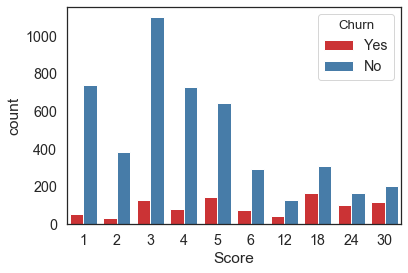

In [194]:
data_eda['Score']=((data['Complain']*5)+1)*data.SatisfactionScore
sns.countplot(data_eda['Score'],hue=data_eda.Churn,palette='Set1')

In [19]:
#Try merging CC and Credit Card for new data
data_cc=data.copy()
data_cc.PreferredPaymentMode=data_cc.PreferredPaymentMode.str.replace('CC','Credit Card')

data_cc=pd.get_dummies(data_cc,drop_first=True)

X_cc=data_cc.drop(['CustomerID','Churn'],axis=1)
y_cc=data_cc.Churn
Xcc_train, Xcc_test, ycc_train, ycc_test = train_test_split(X_cc, y_cc, test_size=0.25 , random_state=1)

In [20]:
data=pd.get_dummies(data,drop_first=True)
X=data.drop(['CustomerID','Churn'],axis=1)
y=data.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [21]:
X_train.shape,len(y_test)

(4021, 29)

In [23]:
y_train.value_counts(normalize=True)

0    0.820691
1    0.179309
Name: Churn, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

0    0.838926
1    0.161074
Name: Churn, dtype: float64

In [25]:
std=StandardScaler()
X_train_scaled=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(std.transform(X_test),columns=X_train.columns)

### Gaussian Naive Bayes

Train data Performance metrics


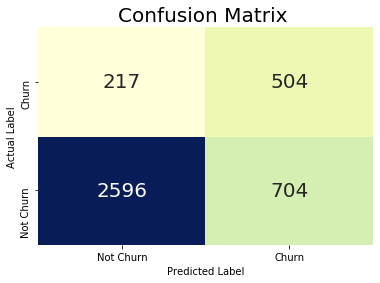

Classification report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3300
           1       0.42      0.70      0.52       721

    accuracy                           0.77      4021
   macro avg       0.67      0.74      0.69      4021
weighted avg       0.83      0.77      0.79      4021

Accuracy : 77.1 %
Precision :  41.72 %
Recall / True Positive Rate :  69.9 %
Specificity / True Negative Rate :  78.67 %
ROC AUC Score: 81.0 %


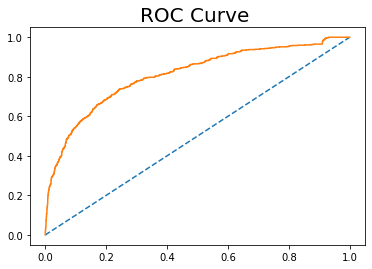

Test data Performance metrics


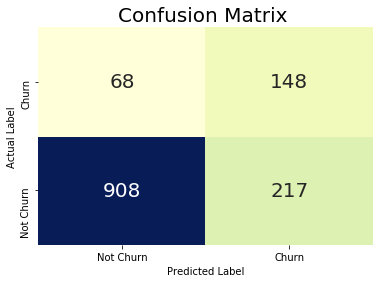

Classification report
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1125
           1       0.41      0.69      0.51       216

    accuracy                           0.79      1341
   macro avg       0.67      0.75      0.69      1341
weighted avg       0.85      0.79      0.81      1341

Accuracy : 78.75 %
Precision :  40.55 %
Recall / True Positive Rate :  68.52 %
Specificity / True Negative Rate :  80.71 %
ROC AUC Score: 81.1 %


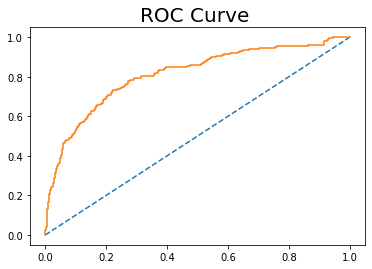

In [26]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(NB_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(NB_model,X_test,y_test)
model_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Naive Bayes'])

In [27]:
predict_nb=NB_model.predict(X_test)

### SVM

Train data Performance metrics


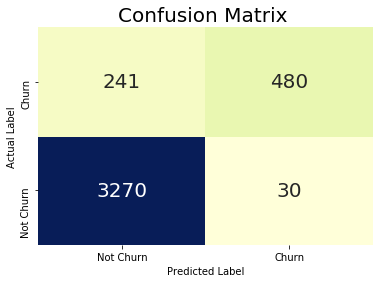

Classification report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3300
           1       0.94      0.67      0.78       721

    accuracy                           0.93      4021
   macro avg       0.94      0.83      0.87      4021
weighted avg       0.93      0.93      0.93      4021

Accuracy : 93.26 %
Precision :  94.12 %
Recall / True Positive Rate :  66.57 %
Specificity / True Negative Rate :  99.09 %
ROC AUC Score: 96.4 %


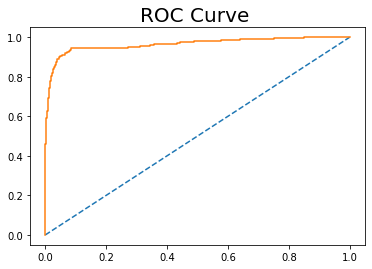

Test data Performance metrics


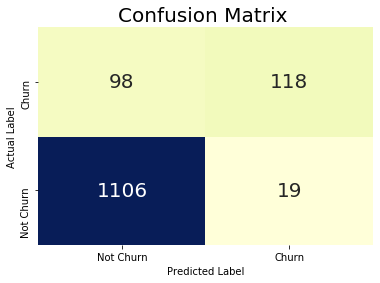

Classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1125
           1       0.86      0.55      0.67       216

    accuracy                           0.91      1341
   macro avg       0.89      0.76      0.81      1341
weighted avg       0.91      0.91      0.90      1341

Accuracy : 91.28 %
Precision :  86.13 %
Recall / True Positive Rate :  54.63 %
Specificity / True Negative Rate :  98.31 %
ROC AUC Score: 92.2 %


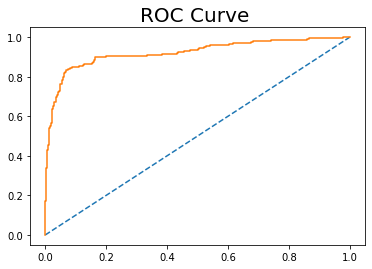

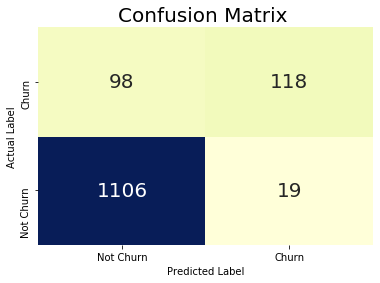

Classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1125
           1       0.86      0.55      0.67       216

    accuracy                           0.91      1341
   macro avg       0.89      0.76      0.81      1341
weighted avg       0.91      0.91      0.90      1341

Accuracy : 91.28 %
Precision :  86.13 %
Recall / True Positive Rate :  54.63 %
Specificity / True Negative Rate :  98.31 %
ROC AUC Score: 92.2 %


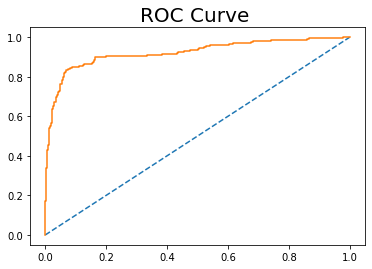

In [100]:
SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(SVM_model,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(SVM_model,X_test_scaled, y_test)
test_score,test_precision,test_recall=cal_performance_metrics(SVM_model,X_test_scaled, y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['SVM'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

param_grid = {'C':[3.0],  # penalty parameter C of the error term - 1.0,2.0, 3.0 0.25,0.5,0.75, 
              'gamma':[0.08] # kernel coefficient for 'rbf',0.02,0.05,0.08,0.1,0.15,0.2
             }
grid_search = GridSearchCV(estimator = svm.SVC(), param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1,scoring=['precision','recall'],refit=False)
grid_search.fit(X_train_scaled, y_train)

Train data Performance metrics


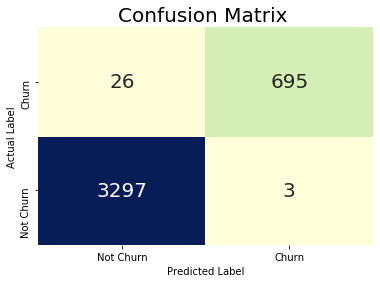

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3300
           1       1.00      0.96      0.98       721

    accuracy                           0.99      4021
   macro avg       0.99      0.98      0.99      4021
weighted avg       0.99      0.99      0.99      4021

Accuracy : 99.28 %
Precision :  99.57 %
Recall / True Positive Rate :  96.39 %
Specificity / True Negative Rate :  99.91 %
ROC AUC Score: 99.9 %


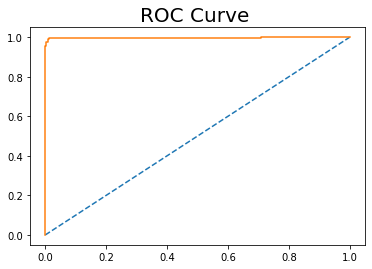

Test data Performance metrics


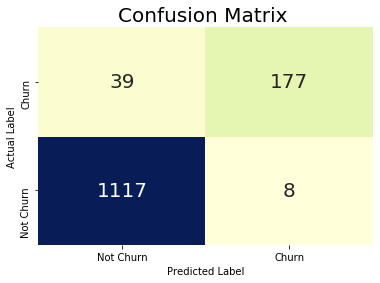

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1125
           1       0.96      0.82      0.88       216

    accuracy                           0.96      1341
   macro avg       0.96      0.91      0.93      1341
weighted avg       0.96      0.96      0.96      1341

Accuracy : 96.5 %
Precision :  95.68 %
Recall / True Positive Rate :  81.94 %
Specificity / True Negative Rate :  99.29 %
ROC AUC Score: 97.9 %


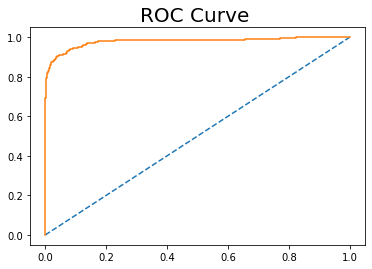

In [29]:
SVM_model= svm.SVC(random_state=1,C=2.0,gamma=0.08,probability=True)
SVM_model.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(SVM_model,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(SVM_model,X_test_scaled, y_test)
#Precision and rea close to 1 - overfitting

Train data Performance metrics


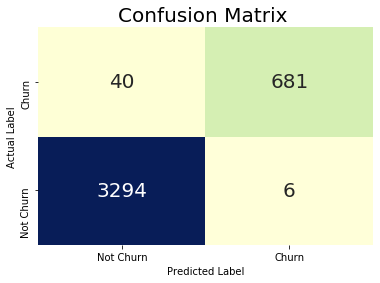

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3300
           1       0.99      0.94      0.97       721

    accuracy                           0.99      4021
   macro avg       0.99      0.97      0.98      4021
weighted avg       0.99      0.99      0.99      4021

Accuracy : 98.86 %
Precision :  99.13 %
Recall / True Positive Rate :  94.45 %
Specificity / True Negative Rate :  99.82 %
ROC AUC Score: 99.8 %


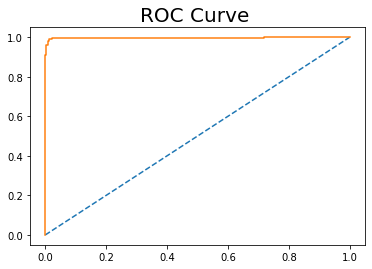

Test data Performance metrics


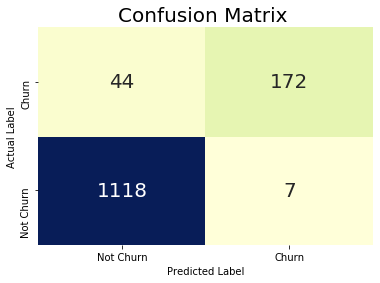

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1125
           1       0.96      0.80      0.87       216

    accuracy                           0.96      1341
   macro avg       0.96      0.90      0.92      1341
weighted avg       0.96      0.96      0.96      1341

Accuracy : 96.2 %
Precision :  96.09 %
Recall / True Positive Rate :  79.63 %
Specificity / True Negative Rate :  99.38 %
ROC AUC Score: 97.4 %


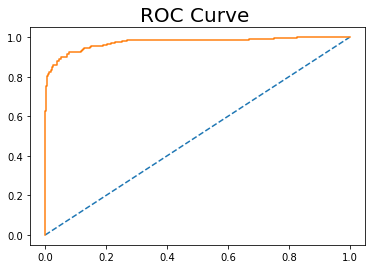

In [30]:
SVM_model= svm.SVC(random_state=1,C=1.5,gamma=0.08,probability=True)
SVM_model.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(SVM_model,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(SVM_model,X_test_scaled, y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['SVM Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])
predict_svm=SVM_model.predict(X_test_scaled)

In [31]:
#linear not good

### Neural Network

Train data Performance metrics


C:\Users\chith\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


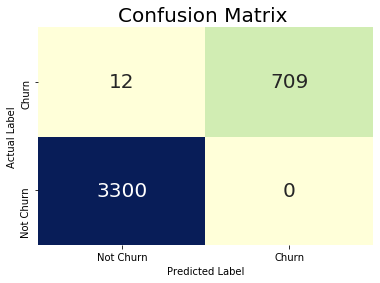

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      0.98      0.99       721

    accuracy                           1.00      4021
   macro avg       1.00      0.99      0.99      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 99.7 %
Precision :  100.0 %
Recall / True Positive Rate :  98.34 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


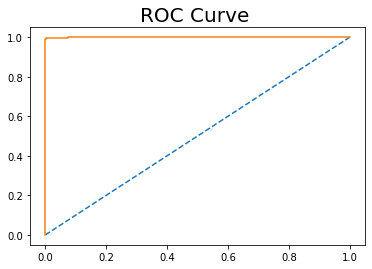

Test data Performance metrics


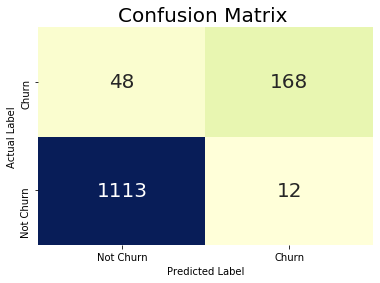

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1125
           1       0.93      0.78      0.85       216

    accuracy                           0.96      1341
   macro avg       0.95      0.88      0.91      1341
weighted avg       0.95      0.96      0.95      1341

Accuracy : 95.53 %
Precision :  93.33 %
Recall / True Positive Rate :  77.78 %
Specificity / True Negative Rate :  98.93 %
ROC AUC Score: 96.8 %


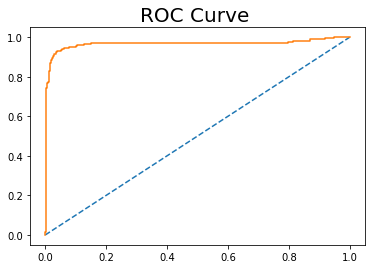

In [32]:
mlp=MLPClassifier()
mlp.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(mlp,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(mlp,X_test_scaled, y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['MLP'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

param_grid = {
    'hidden_layer_sizes': [(100,10,10),(100,100),(200,100)], #,,(100,100,10),50,200,100,,(100,50,10)
    'max_iter': [3000], #2000,7000,5000,4000
    'solver': ['adam'], #sgd
}
nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3,verbose=True,n_jobs=-1,scoring=['precision','recall'],refit=False)

grid_search.fit(X_train_scaled, y_train)
grid_search.cv_results_

Train data Performance metrics


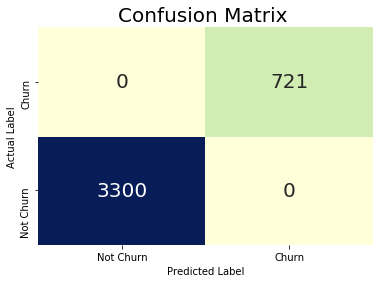

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 100.0 %
Precision :  100.0 %
Recall / True Positive Rate :  100.0 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


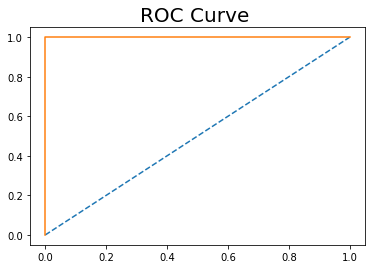

Test data Performance metrics


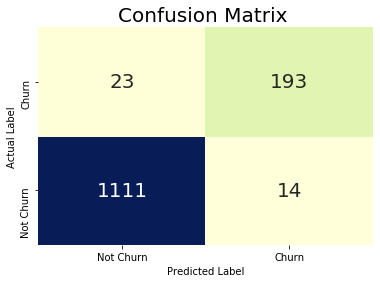

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1125
           1       0.93      0.89      0.91       216

    accuracy                           0.97      1341
   macro avg       0.96      0.94      0.95      1341
weighted avg       0.97      0.97      0.97      1341

Accuracy : 97.24 %
Precision :  93.24 %
Recall / True Positive Rate :  89.35 %
Specificity / True Negative Rate :  98.76 %
ROC AUC Score: 97.3 %


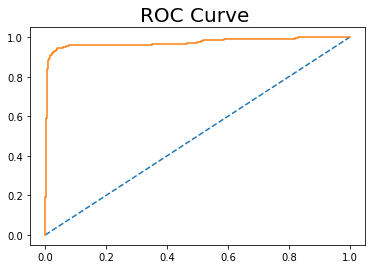

In [33]:
mlp=MLPClassifier(hidden_layer_sizes=(100,10,10),solver='adam')
mlp.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(mlp,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(mlp,X_test_scaled, y_test)
#precision,recall 100% train 89% test Overfitting

Train data Performance metrics


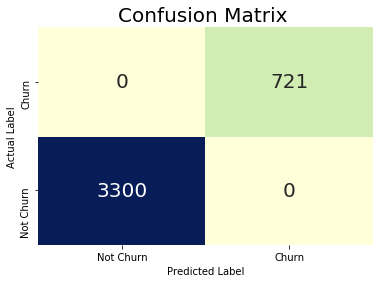

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 100.0 %
Precision :  100.0 %
Recall / True Positive Rate :  100.0 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


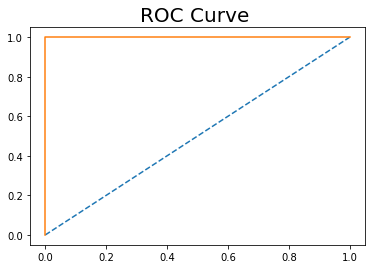

Test data Performance metrics


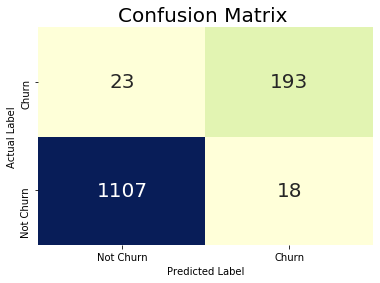

Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1125
           1       0.91      0.89      0.90       216

    accuracy                           0.97      1341
   macro avg       0.95      0.94      0.94      1341
weighted avg       0.97      0.97      0.97      1341

Accuracy : 96.94 %
Precision :  91.47 %
Recall / True Positive Rate :  89.35 %
Specificity / True Negative Rate :  98.4 %
ROC AUC Score: 97.1 %


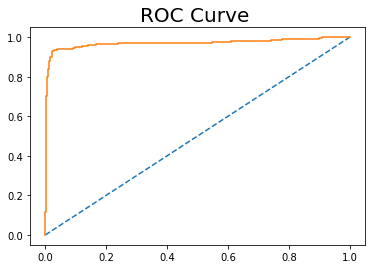

In [34]:
mlp=MLPClassifier(hidden_layer_sizes=(100,100),solver='adam')
mlp.fit(X_train_scaled, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(mlp,X_train_scaled, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(mlp,X_test_scaled, y_test)

temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['MLP Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])
predict_mlp1=mlp.predict(X_test_scaled)
#100% train in test accuracy 97.3 precision - 95, recall 89

In [35]:
model_accuracyDF

Train Score  Test Score  Train Precision  Test Precision  \
Naive Bayes        77.10       78.75            41.72           40.55   
SVM Tuned          98.86       96.20            99.13           96.09   
MLP                99.70       95.53           100.00           93.33   
MLP Tuned         100.00       96.94           100.00           91.47   

             Train Recall  Test Recall  
Naive Bayes         69.90        68.52  
SVM Tuned           94.45        79.63  
MLP                 98.34        77.78  
MLP Tuned          100.00        89.35

#LIght GBM,CatBoost
Try algorith,Plot,tune

### Linear Discriminant Analysis

Train data Performance metrics


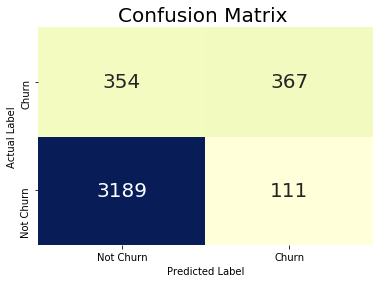

Classification report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3300
           1       0.77      0.51      0.61       721

    accuracy                           0.88      4021
   macro avg       0.83      0.74      0.77      4021
weighted avg       0.88      0.88      0.87      4021

Accuracy : 88.44 %
Precision :  76.78 %
Recall / True Positive Rate :  50.9 %
Specificity / True Negative Rate :  96.64 %
ROC AUC Score: 88.5 %


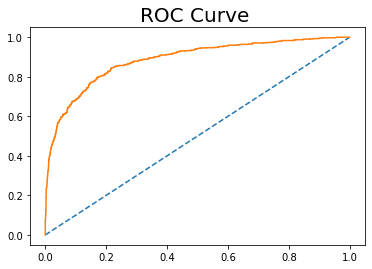

Test data Performance metrics


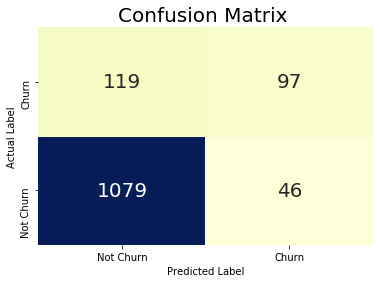

Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1125
           1       0.68      0.45      0.54       216

    accuracy                           0.88      1341
   macro avg       0.79      0.70      0.73      1341
weighted avg       0.86      0.88      0.87      1341

Accuracy : 87.7 %
Precision :  67.83 %
Recall / True Positive Rate :  44.91 %
Specificity / True Negative Rate :  95.91 %
ROC AUC Score: 88.7 %


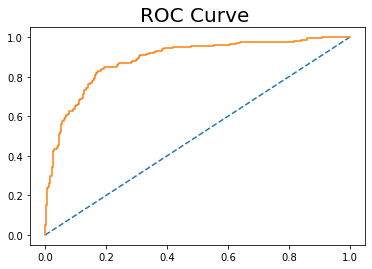

In [36]:
#Basic LDA model
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(LDA_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(LDA_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['LDA'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

In [37]:
#All LDA solver algorithm show similar result
#accuracy score is same for eigen,lsqr and svd. I am taking default parameters.

#### Log transformation

In [38]:
cont=['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']
cat=['CityTier_Tier-2', 'CityTier_Tier-3','SatisfactionScore','Complain','PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery','PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married','MaritalStatus_Single']
data_LDA=data.copy()

In [39]:
data_LDA_log=data_LDA[cont].copy()
print('Before imputation\n',data_LDA_log[data_LDA_log[cont]==0][cont].notnull().sum())
data_LDA_log['Tenure']=data_LDA_log['Tenure'].replace(0,1)
data_LDA_log['DaySinceLastOrder']=data_LDA_log['DaySinceLastOrder'].replace(0,1)
data_LDA_log['CashbackAmount']=data_LDA_log['CashbackAmount'].replace(0,1)
data_LDA_log['CouponUsed']=data_LDA_log['CouponUsed'].replace(0,0.1)
data_LDA_log['HourSpendOnApp']=data_LDA_log['HourSpendOnApp'].replace(0,0.1)
data_LDA_log['NumberOfDeviceRegistered']=data_LDA_log['NumberOfDeviceRegistered'].replace(0,0.1)
data_LDA_log['NumberOfAddress']=data_LDA_log['NumberOfAddress'].replace(0,0.1)
data_LDA_log['OrderCount']=data_LDA_log['OrderCount'].replace(0,0.1)
print('\nAfter imputation\n',data_LDA_log[data_LDA_log[cont]==0][cont].notnull().sum())
data_LDA_log=np.log(data_LDA_log)

Before imputation
 Tenure                          505
WarehouseToHome                   0
HourSpendOnApp                    3
NumberOfDeviceRegistered          0
NumberOfAddress                   0
OrderAmountHikeFromlastYear       0
CouponUsed                     1029
OrderCount                        0
DaySinceLastOrder               472
CashbackAmount                    4
dtype: int64

After imputation
 Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
NumberOfAddress                0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64



data_LDA_log['Churn']=data_LDA['Churn']
fig,ax=plt.subplots(nrows=10)
fig.set_size_inches(10,20)
for i,var in enumerate(cont):
    data_LDA_log.groupby('Churn')[var].plot(kind='kde',ax=ax[i])
    plt.title(var)

fig,ax=plt.subplots(nrows=10)
fig.set_size_inches(10,20)
for i,var in enumerate(cont):
    qqplot(data_LDA_log[var],line='s',ax=ax[i])

In [40]:
data_LDA_log=pd.concat([data_LDA_log,data_LDA[cat]],axis=1)
X_log_train,X_log_test,y_log_train,y_log_test=train_test_split(data_LDA_log, y, test_size=0.25 , random_state=1)

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0  1.386294         1.791759        1.098612                  1.098612   
1  2.079442         2.079442        1.098612                  1.386294   
2  2.079442         3.401197        0.693147                  1.386294   
3  0.000000         2.708050        0.693147                  1.386294   
4  0.000000         2.484907        1.098612                  1.098612   

   NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         2.197225                     2.397895    0.000000         0.0   
1         1.945910                     2.708050   -2.302585         0.0   
2         1.791759                     2.639057   -2.302585         0.0   
3         2.079442                     3.135494   -2.302585         0.0   
4         1.098612                     2.397895    0.000000         0.0   

   DaySinceLastOrder  CashbackAmount  ...  PreferredPaymentMode_Debit Card  \
0           1.609438        5.074736  ...                                1   
1           0.000000        4.794964  ...                                0   
2           1.098612        4.789822  ...                                1   
3           1.098612        4.898362  ...                                1   
4           1.098612        4.864453  ...                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                              0                         0            0   
1                              0                         1            1   
2                              0                         0            1   
3                              0                         0            1   
4                              0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1  

[5 rows x 28 columns]

Train data Performance metrics


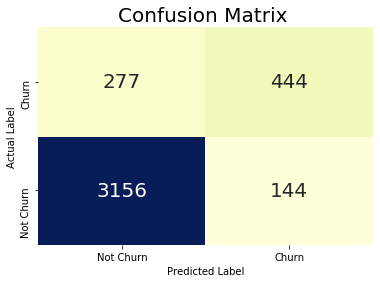

Classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3300
           1       0.76      0.62      0.68       721

    accuracy                           0.90      4021
   macro avg       0.84      0.79      0.81      4021
weighted avg       0.89      0.90      0.89      4021

Accuracy : 89.53 %
Precision :  75.51 %
Recall / True Positive Rate :  61.58 %
Specificity / True Negative Rate :  95.64 %
ROC AUC Score: 89.3 %


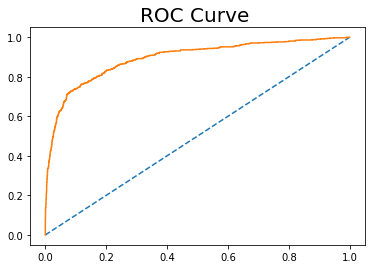

Test data Performance metrics


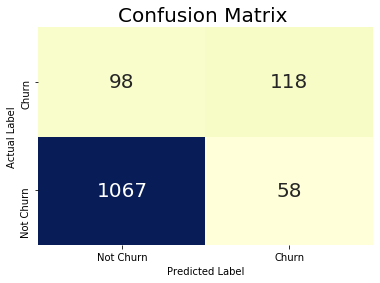

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1125
           1       0.67      0.55      0.60       216

    accuracy                           0.88      1341
   macro avg       0.79      0.75      0.77      1341
weighted avg       0.88      0.88      0.88      1341

Accuracy : 88.37 %
Precision :  67.05 %
Recall / True Positive Rate :  54.63 %
Specificity / True Negative Rate :  94.84 %
ROC AUC Score: 88.5 %


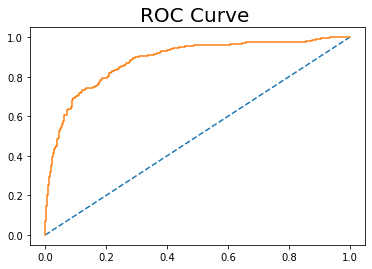

In [42]:
LDA_model_log= LinearDiscriminantAnalysis()
LDA_model_log.fit(X_log_train, y_log_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(LDA_model_log,X_log_train, y_log_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(LDA_model_log,X_log_test, y_log_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['LDA Log Transformed'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

### Gradient Boosting

Train data Performance metrics


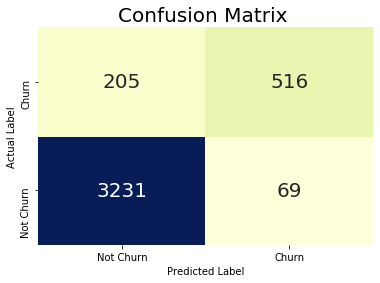

Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3300
           1       0.88      0.72      0.79       721

    accuracy                           0.93      4021
   macro avg       0.91      0.85      0.87      4021
weighted avg       0.93      0.93      0.93      4021

Accuracy : 93.19 %
Precision :  88.21 %
Recall / True Positive Rate :  71.57 %
Specificity / True Negative Rate :  97.91 %
ROC AUC Score: 96.2 %


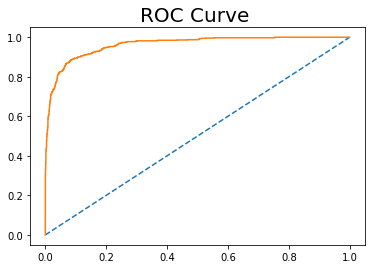

Test data Performance metrics


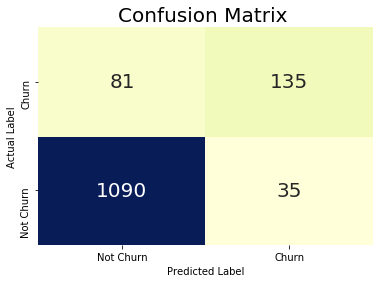

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1125
           1       0.79      0.62      0.70       216

    accuracy                           0.91      1341
   macro avg       0.86      0.80      0.82      1341
weighted avg       0.91      0.91      0.91      1341

Accuracy : 91.35 %
Precision :  79.41 %
Recall / True Positive Rate :  62.5 %
Specificity / True Negative Rate :  96.89 %
ROC AUC Score: 93.3 %


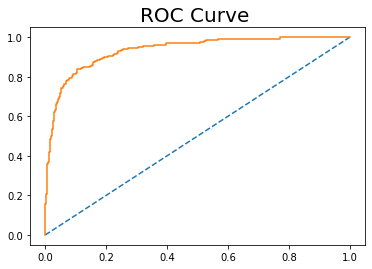

In [91]:
GB_model=GradientBoostingClassifier()
GB_model.fit(X_train,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(GB_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(GB_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Gradient Boosting'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

In [44]:
#Merge CC and Credit Card
#Many in Tier 3 cities are using e wallets

In [45]:
param_grid_GB={'n_estimators' : [500,300],#100,200,300,400,
               'min_samples_split' : [30,80], #40,50,60,80,100 #between 0.5 to 1% (2%?)
               'min_samples_leaf' : [5,10],#5,20,25
               'max_depth' : [5],#1,2,3,4
               'learning_rate' : [0.1],#0.01,0.1,1
               'subsample':[0.8]
               }
grid_search=GridSearchCV(GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt'),param_grid=param_grid_GB,n_jobs=-1,cv=3,verbose=True,scoring='precision')
grid_search.fit(X_train, y_train)
#min_sample_leaf =10,min_sample_split=30

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   19.2s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(max_features='sqrt'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [30, 80],
                         'n_estimators': [500, 300], 'subsample': [0.8]},
             scoring='precision', verbose=True)

Train data Performance metrics


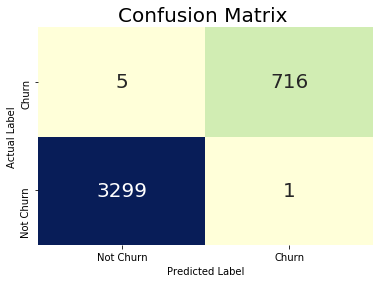

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      0.99      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 99.85 %
Precision :  99.86 %
Recall / True Positive Rate :  99.31 %
Specificity / True Negative Rate :  99.97 %
ROC AUC Score: 100.0 %


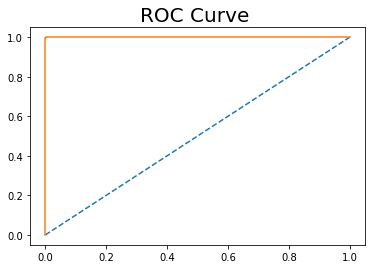

Test data Performance metrics


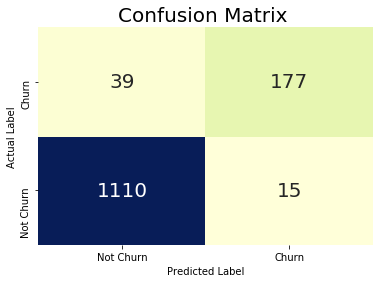

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1125
           1       0.92      0.82      0.87       216

    accuracy                           0.96      1341
   macro avg       0.94      0.90      0.92      1341
weighted avg       0.96      0.96      0.96      1341

Accuracy : 95.97 %
Precision :  92.19 %
Recall / True Positive Rate :  81.94 %
Specificity / True Negative Rate :  98.67 %
ROC AUC Score: 97.6 %


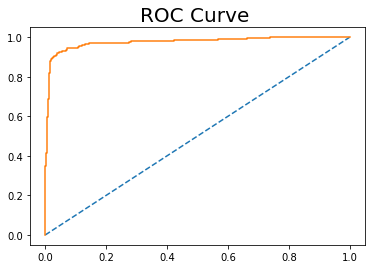

In [46]:
best_GB=grid_search.best_estimator_

print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(best_GB,X_train, y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(best_GB,X_test,y_test)
#Overfiting

Train data Performance metrics


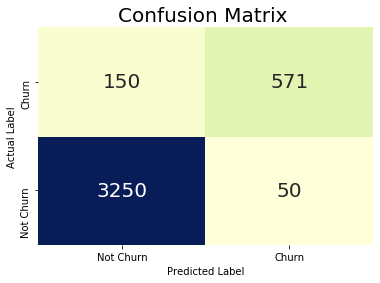

Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3300
           1       0.92      0.79      0.85       721

    accuracy                           0.95      4021
   macro avg       0.94      0.89      0.91      4021
weighted avg       0.95      0.95      0.95      4021

Accuracy : 95.03 %
Precision :  91.95 %
Recall / True Positive Rate :  79.2 %
Specificity / True Negative Rate :  98.48 %
ROC AUC Score: 98.4 %


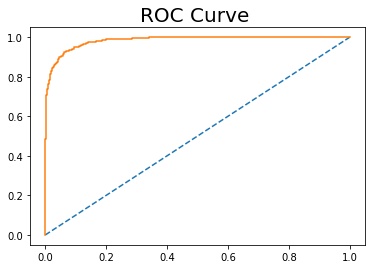

Test data Performance metrics


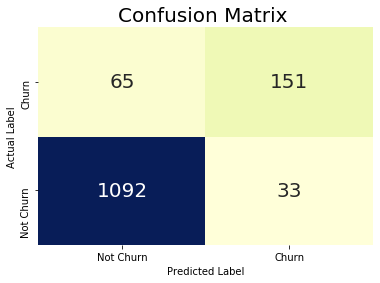

Classification report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1125
           1       0.82      0.70      0.76       216

    accuracy                           0.93      1341
   macro avg       0.88      0.83      0.86      1341
weighted avg       0.92      0.93      0.92      1341

Accuracy : 92.69 %
Precision :  82.07 %
Recall / True Positive Rate :  69.91 %
Specificity / True Negative Rate :  97.07 %
ROC AUC Score: 94.9 %


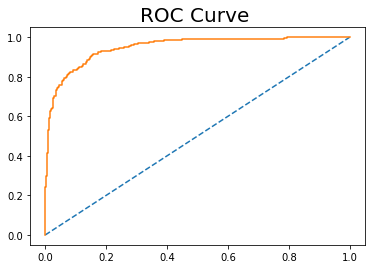

In [47]:
gb_model2=GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',n_estimators=300,min_samples_split=20,min_samples_leaf=5,max_depth=3,subsample=0.8)
gb_model2.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(gb_model2,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(gb_model2,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Gradient Boosting Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

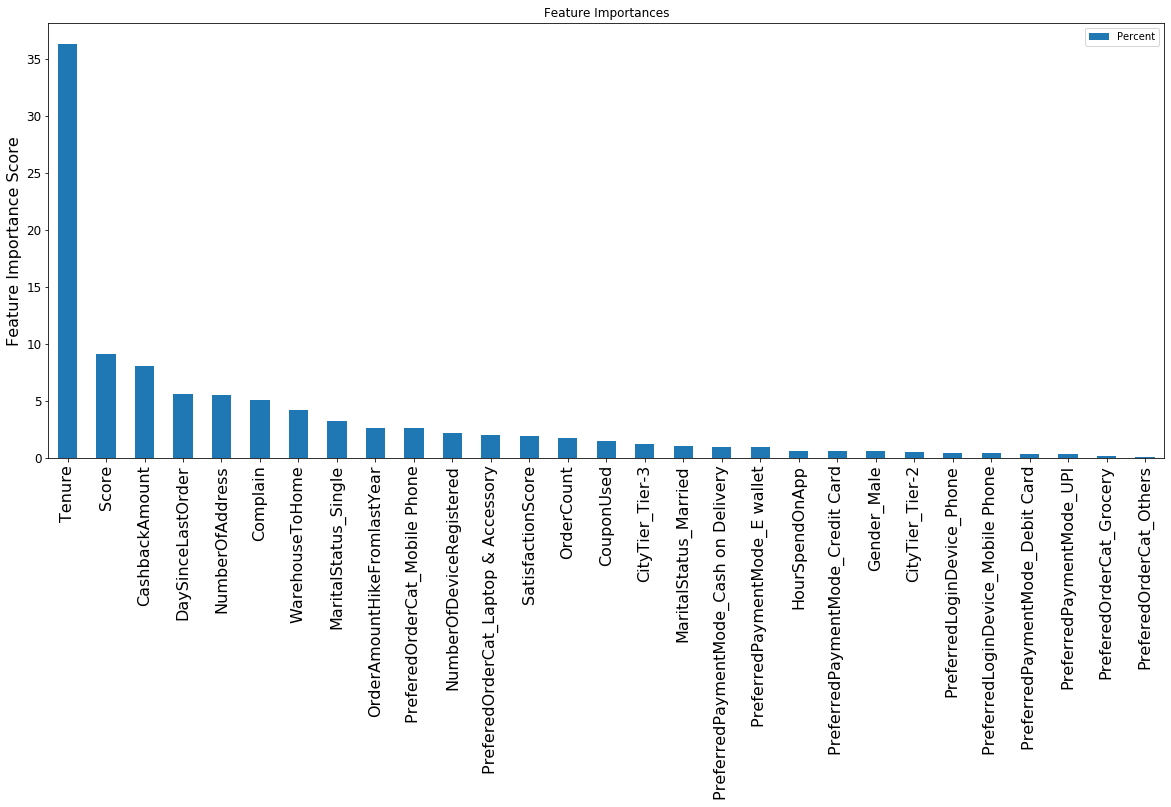

In [48]:
feature_importance=pd.DataFrame((gb_model2.feature_importances_*100).round(2),index=X_train.columns,columns=['Percent']).sort_values('Percent',ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances',figsize=(20,8),fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=16)
plt.xticks(fontsize=16)

feature_importance

In [49]:
#Best Gradient Boosting algorithm

### Adaboost Classifier

Train data Performance metrics


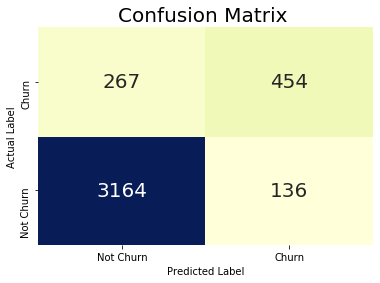

Classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3300
           1       0.77      0.63      0.69       721

    accuracy                           0.90      4021
   macro avg       0.85      0.79      0.82      4021
weighted avg       0.89      0.90      0.90      4021

Accuracy : 89.98 %
Precision :  76.95 %
Recall / True Positive Rate :  62.97 %
Specificity / True Negative Rate :  95.88 %
ROC AUC Score: 93.7 %


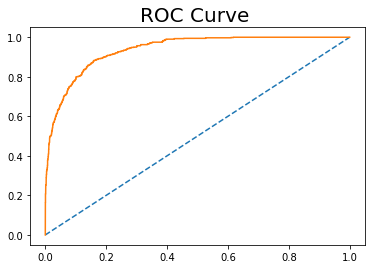

Test data Performance metrics


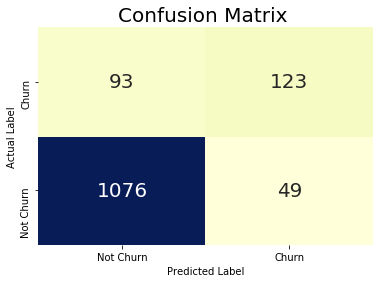

Classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1125
           1       0.72      0.57      0.63       216

    accuracy                           0.89      1341
   macro avg       0.82      0.76      0.79      1341
weighted avg       0.89      0.89      0.89      1341

Accuracy : 89.41 %
Precision :  71.51 %
Recall / True Positive Rate :  56.94 %
Specificity / True Negative Rate :  95.64 %
ROC AUC Score: 91.8 %


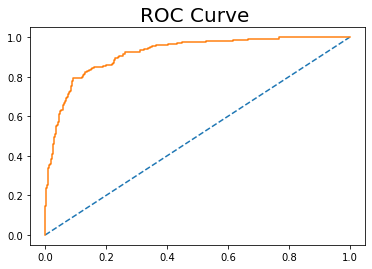

In [50]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(ADB_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(ADB_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['AdaBoost'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

grid = { 'n_estimators' : [75,200],#try 100
               'learning_rate':[0.05,0.01]
             }

grid_search = GridSearchCV(estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4)),scoring=['precision','recall'],
                                                          param_grid = grid, cv = 3,verbose=True,n_jobs=-1,refit=False)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

Train data Performance metrics


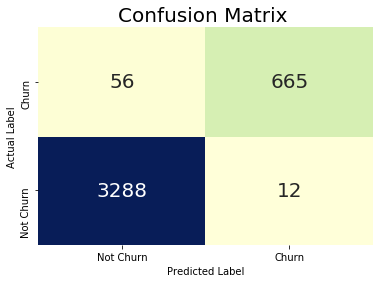

Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3300
           1       0.98      0.92      0.95       721

    accuracy                           0.98      4021
   macro avg       0.98      0.96      0.97      4021
weighted avg       0.98      0.98      0.98      4021

Accuracy : 98.31 %
Precision :  98.23 %
Recall / True Positive Rate :  92.23 %
Specificity / True Negative Rate :  99.64 %
ROC AUC Score: 99.9 %


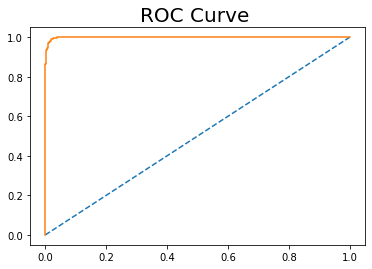

Test data Performance metrics


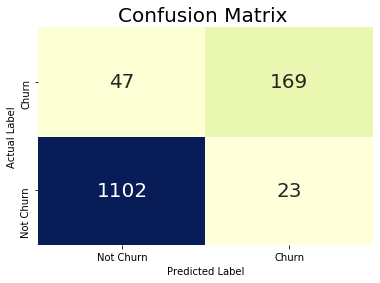

Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1125
           1       0.88      0.78      0.83       216

    accuracy                           0.95      1341
   macro avg       0.92      0.88      0.90      1341
weighted avg       0.95      0.95      0.95      1341

Accuracy : 94.78 %
Precision :  88.02 %
Recall / True Positive Rate :  78.24 %
Specificity / True Negative Rate :  97.96 %
ROC AUC Score: 96.8 %


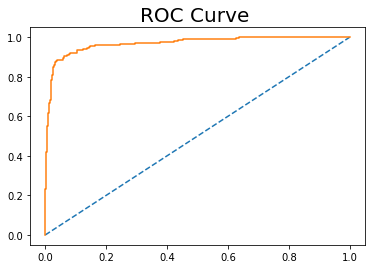

In [51]:
best_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),learning_rate=0.05,n_estimators=200)
best_model.fit(X_train,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(best_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(best_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['AdaBoost Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

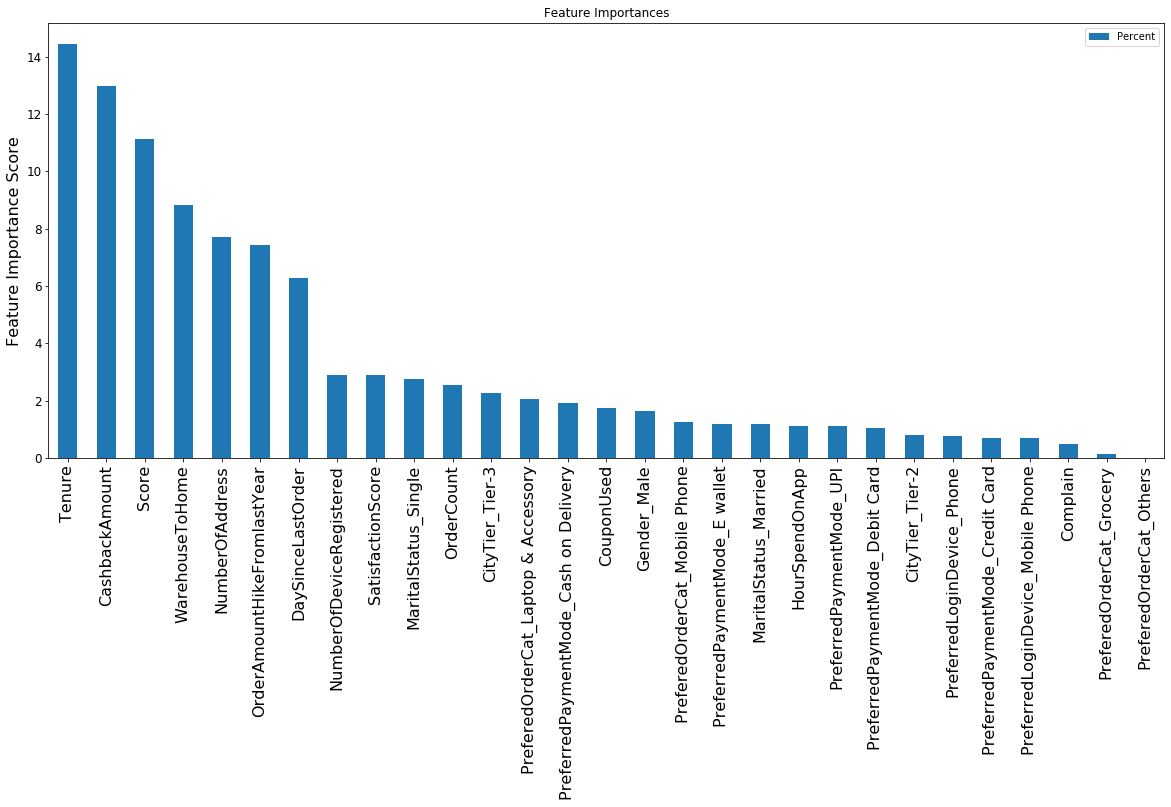

In [52]:
feature_importance=pd.DataFrame((best_model.feature_importances_*100).round(2),index=X_train.columns,columns=['Percent']).sort_values('Percent',ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances',figsize=(20,8),fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=16)
plt.xticks(fontsize=16)

feature_importance

### XGBoost

Train data Performance metrics


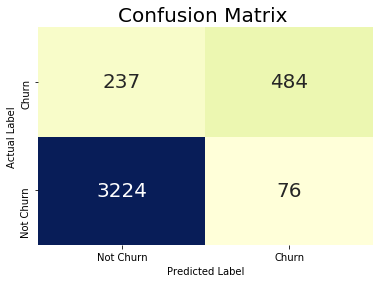

Classification report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3300
           1       0.86      0.67      0.76       721

    accuracy                           0.92      4021
   macro avg       0.90      0.82      0.85      4021
weighted avg       0.92      0.92      0.92      4021

Accuracy : 92.22 %
Precision :  86.43 %
Recall / True Positive Rate :  67.13 %
Specificity / True Negative Rate :  97.7 %
ROC AUC Score: 95.8 %


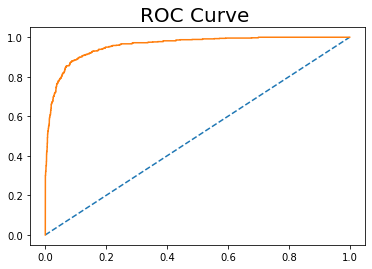

Test data Performance metrics


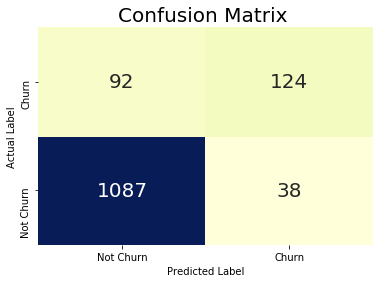

Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1125
           1       0.77      0.57      0.66       216

    accuracy                           0.90      1341
   macro avg       0.84      0.77      0.80      1341
weighted avg       0.90      0.90      0.90      1341

Accuracy : 90.31 %
Precision :  76.54 %
Recall / True Positive Rate :  57.41 %
Specificity / True Negative Rate :  96.62 %
ROC AUC Score: 93.2 %


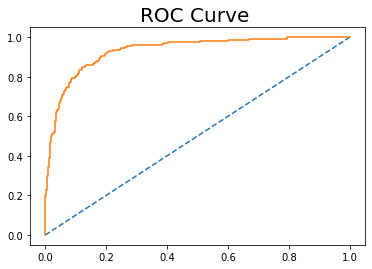

In [53]:
XGB_model=xgb.XGBClassifier(random_state=1)
XGB_model.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(XGB_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(XGB_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['XGBoost'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

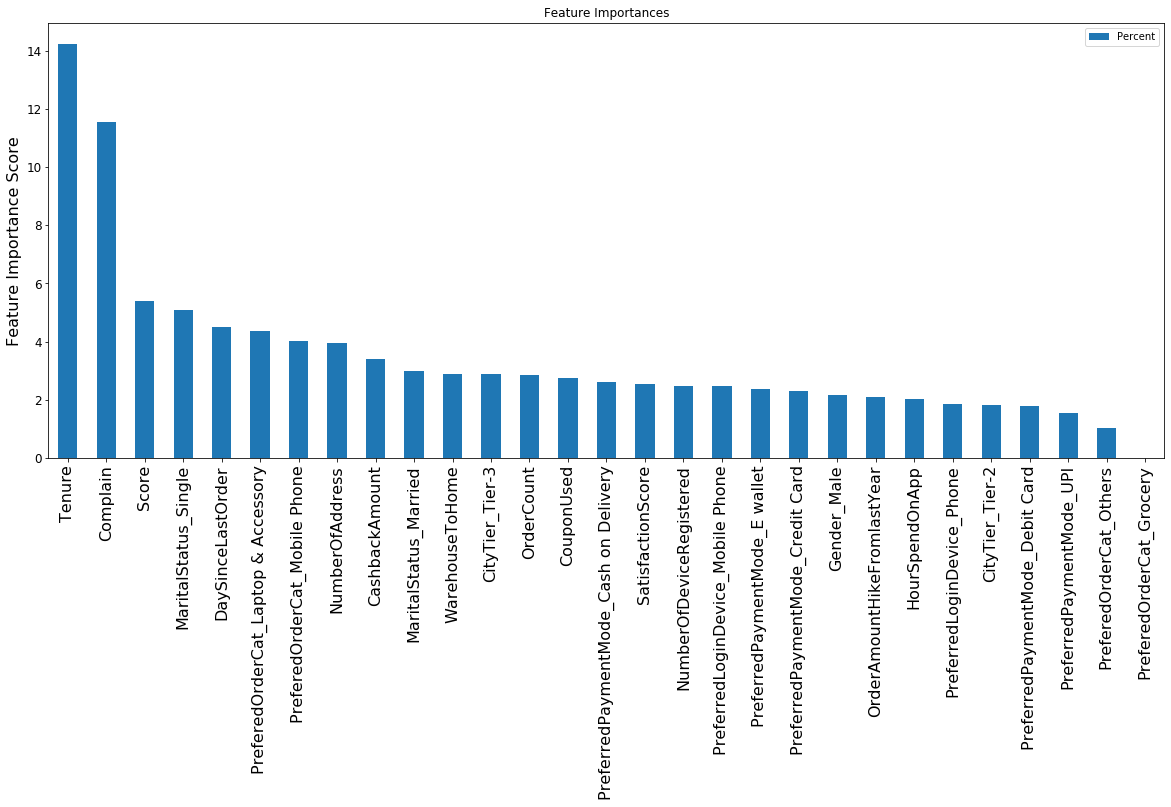

In [54]:
feature_importance=pd.DataFrame((XGB_model.feature_importances_*100).round(2),index=X_train.columns,columns=['Percent']).sort_values('Percent',ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances',figsize=(20,8),fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=16)
plt.xticks(fontsize=16)

### KNN Classifier

Train data Performance metrics


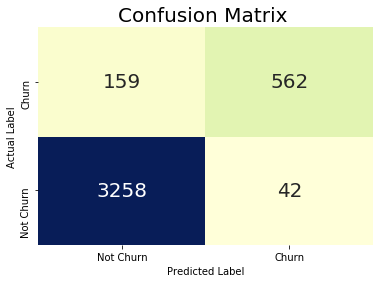

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3300
           1       0.93      0.78      0.85       721

    accuracy                           0.95      4021
   macro avg       0.94      0.88      0.91      4021
weighted avg       0.95      0.95      0.95      4021

Accuracy : 95.0 %
Precision :  93.05 %
Recall / True Positive Rate :  77.95 %
Specificity / True Negative Rate :  98.73 %
ROC AUC Score: 98.8 %


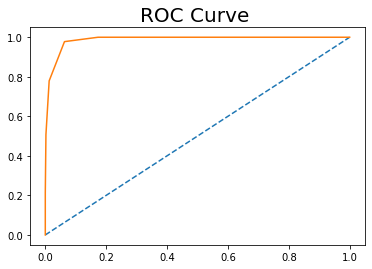

Test data Performance metrics


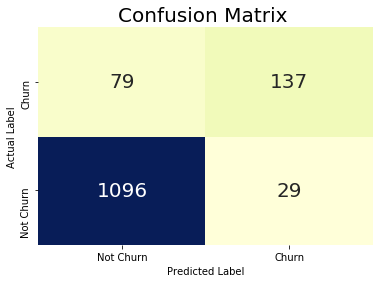

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1125
           1       0.83      0.63      0.72       216

    accuracy                           0.92      1341
   macro avg       0.88      0.80      0.84      1341
weighted avg       0.92      0.92      0.92      1341

Accuracy : 91.95 %
Precision :  82.53 %
Recall / True Positive Rate :  63.43 %
Specificity / True Negative Rate :  97.42 %
ROC AUC Score: 93.8 %


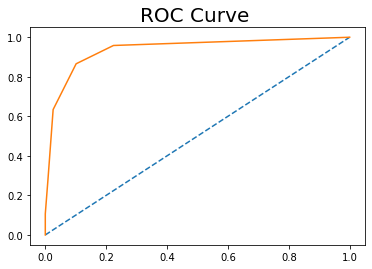

In [55]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(KNN_model,X_train_scaled,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(KNN_model,X_test_scaled,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['KNN'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

In [56]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [57]:
#KNN recall is very low for 1. Not tuning it further

### Decision Tree

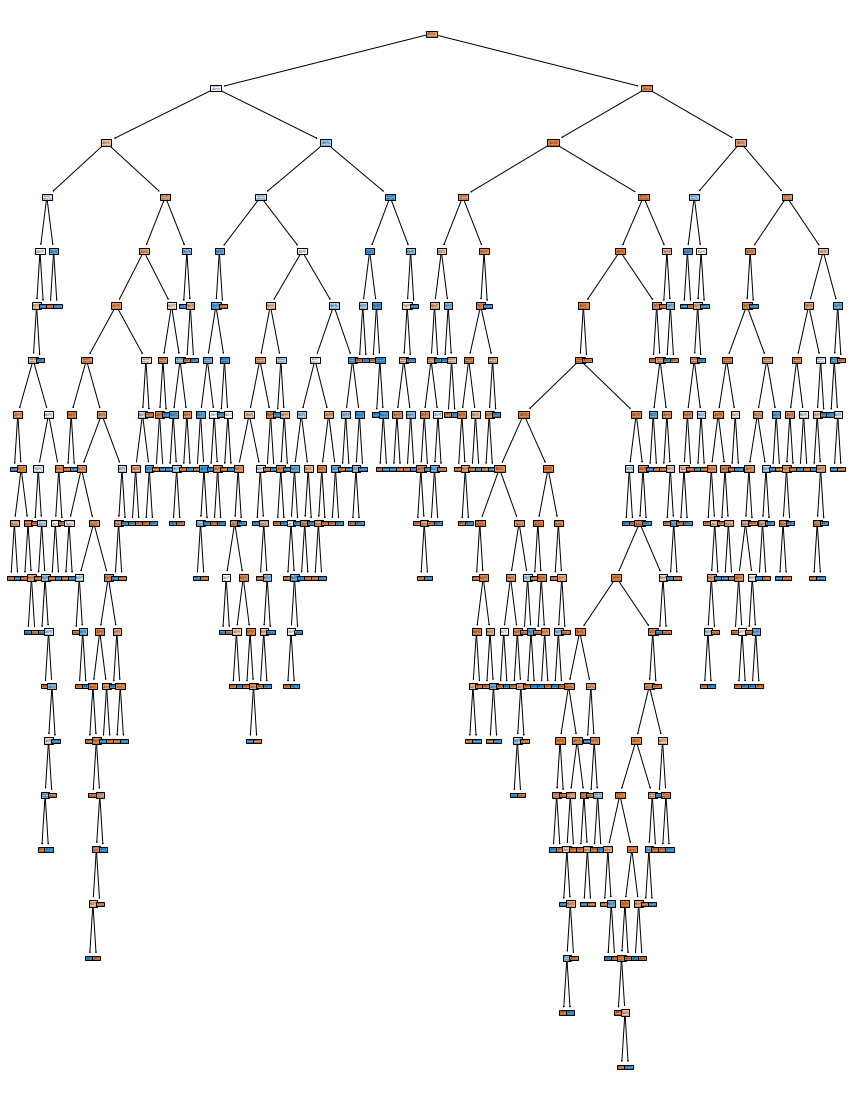

In [58]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
plt.figure(figsize=(15,20))
tree.plot_tree(DT_model.fit(X_train, y_train),filled=True) 
plt.show()

Train data Performance metrics


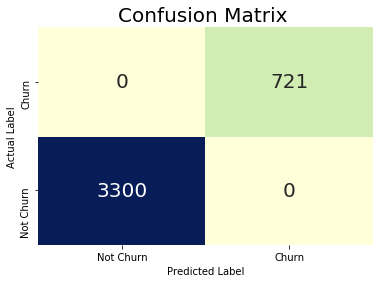

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 100.0 %
Precision :  100.0 %
Recall / True Positive Rate :  100.0 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


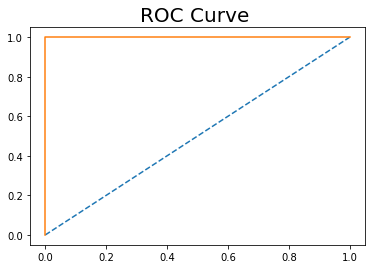

Test data Performance metrics


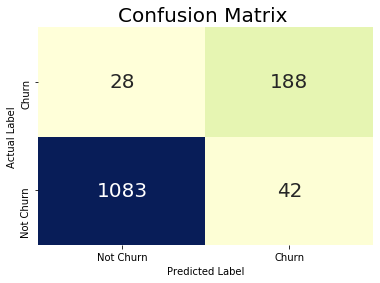

Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1125
           1       0.82      0.87      0.84       216

    accuracy                           0.95      1341
   macro avg       0.90      0.92      0.91      1341
weighted avg       0.95      0.95      0.95      1341

Accuracy : 94.78 %
Precision :  81.74 %
Recall / True Positive Rate :  87.04 %
Specificity / True Negative Rate :  96.27 %
ROC AUC Score: 91.7 %


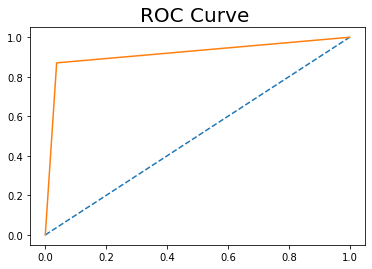

In [59]:
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(DT_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(DT_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Decision Tree'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

Text(0, 0.5, 'Feature Importance Score')

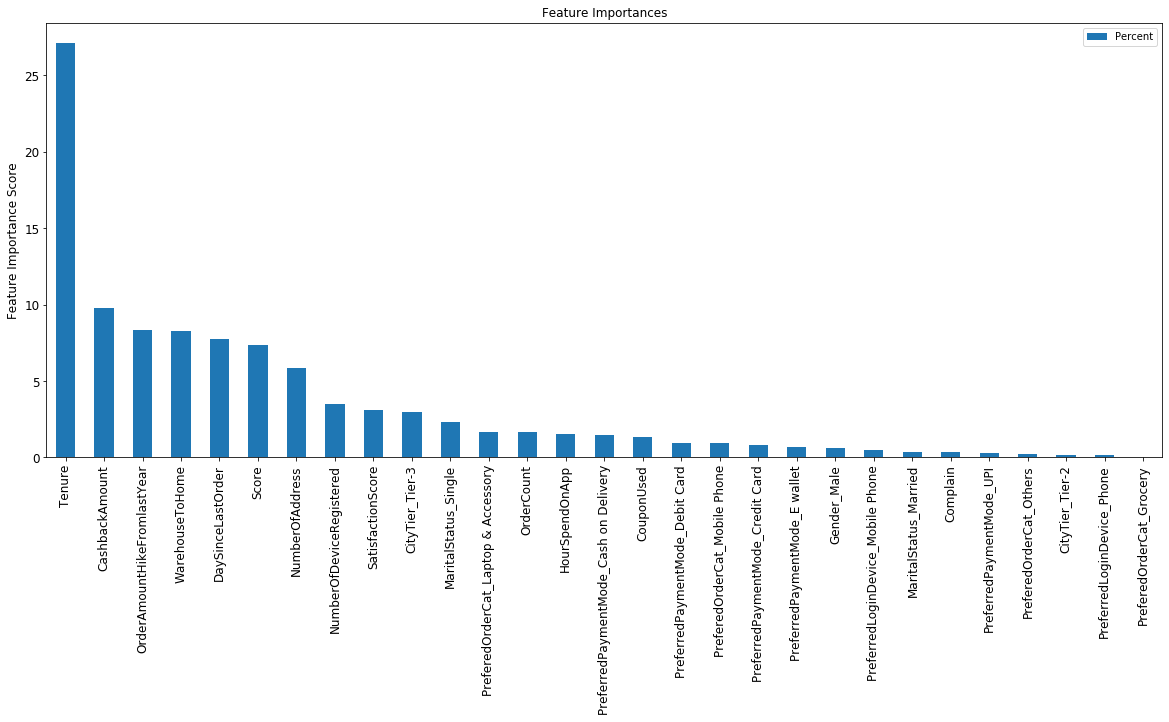

In [60]:
feature_importance=pd.DataFrame((DT_model.feature_importances_*100).round(2),index=X_train.columns,columns=['Percent']).sort_values('Percent',ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances',figsize=(20,8),fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=12)

In [61]:
feature_importance[feature_importance.Percent>2].index

Index(['Tenure', 'CashbackAmount', 'OrderAmountHikeFromlastYear',
       'WarehouseToHome', 'DaySinceLastOrder', 'Score', 'NumberOfAddress',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'CityTier_Tier-3',
       'MaritalStatus_Single'],
      dtype='object')

param_grid={   'min_samples_split' : [10,5], #30,40,50 #between 0.5 to 1% (2%?)
               'min_samples_leaf' : [3,5,2,],#2,10
               'max_depth' : [15],#5,10,12
                'criterion' :['gini','entropy']
               }
grid_search=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1,cv=7,verbose=True,scoring=['precision','recall'],refit=False)
grid_search.fit(X_train, y_train)
#min_sample_leaf =10,min_sample_split=30
grid_search.cv_results_

Train data Performance metrics


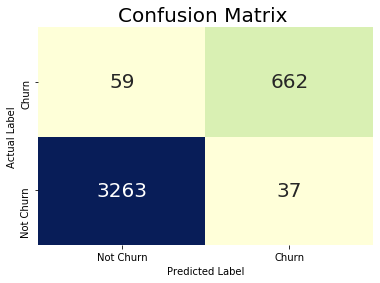

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3300
           1       0.95      0.92      0.93       721

    accuracy                           0.98      4021
   macro avg       0.96      0.95      0.96      4021
weighted avg       0.98      0.98      0.98      4021

Accuracy : 97.61 %
Precision :  94.71 %
Recall / True Positive Rate :  91.82 %
Specificity / True Negative Rate :  98.88 %
ROC AUC Score: 99.7 %


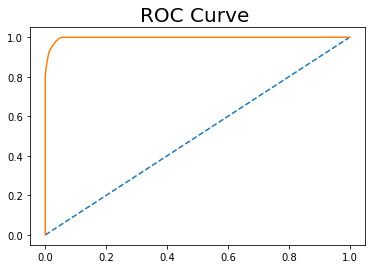

Test data Performance metrics


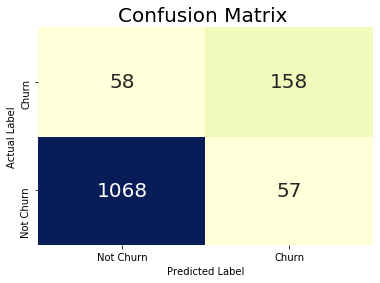

Classification report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1125
           1       0.73      0.73      0.73       216

    accuracy                           0.91      1341
   macro avg       0.84      0.84      0.84      1341
weighted avg       0.91      0.91      0.91      1341

Accuracy : 91.42 %
Precision :  73.49 %
Recall / True Positive Rate :  73.15 %
Specificity / True Negative Rate :  94.93 %
ROC AUC Score: 92.2 %


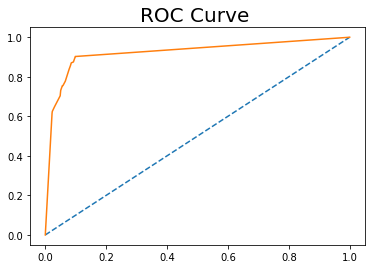

In [62]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=3,min_samples_split=5)
dt_model.fit(X_train,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(dt_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(dt_model,X_test,y_test)
#Overfitting

Train data Performance metrics


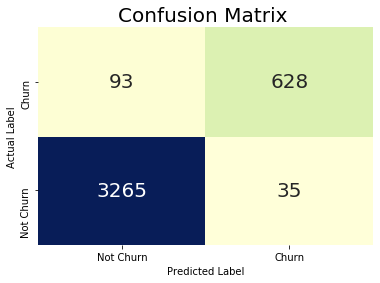

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3300
           1       0.95      0.87      0.91       721

    accuracy                           0.97      4021
   macro avg       0.96      0.93      0.94      4021
weighted avg       0.97      0.97      0.97      4021

Accuracy : 96.82 %
Precision :  94.72 %
Recall / True Positive Rate :  87.1 %
Specificity / True Negative Rate :  98.94 %
ROC AUC Score: 99.4 %


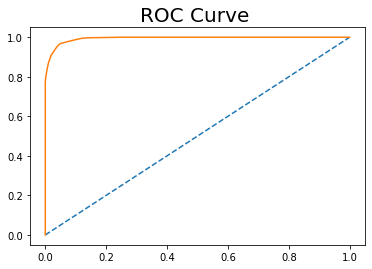

Test data Performance metrics


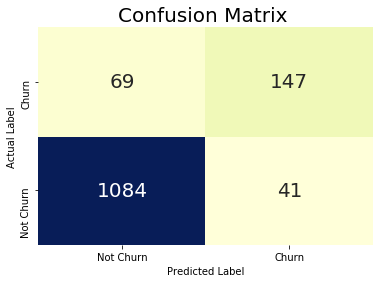

Classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1125
           1       0.78      0.68      0.73       216

    accuracy                           0.92      1341
   macro avg       0.86      0.82      0.84      1341
weighted avg       0.91      0.92      0.92      1341

Accuracy : 91.8 %
Precision :  78.19 %
Recall / True Positive Rate :  68.06 %
Specificity / True Negative Rate :  96.36 %
ROC AUC Score: 91.0 %


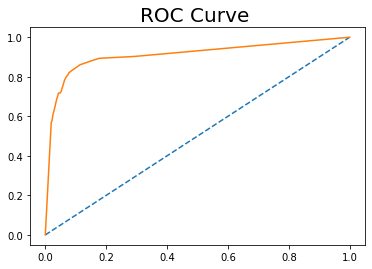

In [63]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=3,min_samples_split=5)
dt_model.fit(X_train,y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(dt_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(dt_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Decision Tree Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

### Randon Forest Classifier

In [64]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
feature_importance=pd.DataFrame((DT_model.feature_importances_*100).round(2),index=X_train.columns,columns=['Percent']).sort_values('Percent',ascending=False)
#cross_val_score(RF_model,X_train, y_train,cv=5,scoring='precision')

In [65]:
col_DT=['Tenure', 'CashbackAmount', 'Score', 'WarehouseToHome',
       'DaySinceLastOrder', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'Complain', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'OrderCount', 'CouponUsed', 
       'MaritalStatus_Single', 'PreferedOrderCat_Mobile Phone',
       'HourSpendOnApp', 'MaritalStatus_Married', 'Gender_Male',
       'PreferedOrderCat_Laptop & Accessory',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Others','CityTier_Tier-2','CityTier_Tier-3',
       'PreferedOrderCat_Grocery']#'Complain','SatisfactionScore','DaySinceLastOrder','WarehouseToHome',' CouponUsed', 

In [66]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train[col_DT], y_train)
#cross_val_score(RF_model,X_train[col_DT], y_train,cv=5,scoring='precision')

RandomForestClassifier(random_state=1)

Train data Performance metrics


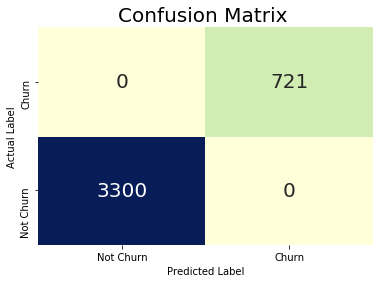

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 100.0 %
Precision :  100.0 %
Recall / True Positive Rate :  100.0 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


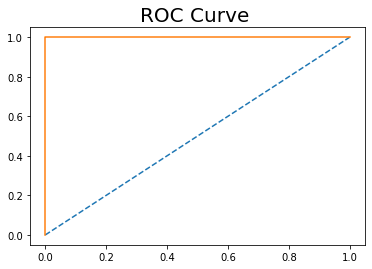

Test data Performance metrics


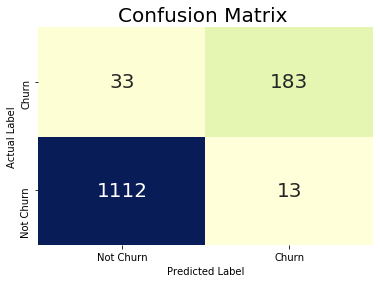

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1125
           1       0.93      0.85      0.89       216

    accuracy                           0.97      1341
   macro avg       0.95      0.92      0.93      1341
weighted avg       0.97      0.97      0.97      1341

Accuracy : 96.57 %
Precision :  93.37 %
Recall / True Positive Rate :  84.72 %
Specificity / True Negative Rate :  98.84 %
ROC AUC Score: 98.5 %


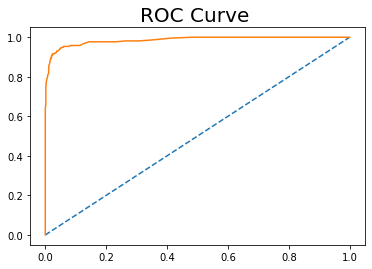

In [67]:
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(RF_model,X_train[col_DT],y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(RF_model,X_test[col_DT],y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Random Forest'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

param_grid_GB={'n_estimators' : [200],#
               'min_samples_split' : [2], #20,30,40,50 #between 0.5 to 1% (2%?) ,3,5,7,10
               'min_samples_leaf' : [2],#3,5,10,20,25
               'max_depth' : [12],#14,15,7,10,
               'max_features':[5]
               }
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_GB,n_jobs=-1,cv=3,verbose=True,scoring=['precision','recall'],refit=False)
grid_search.fit(X_train[col_DT], y_train)


Train data Performance metrics


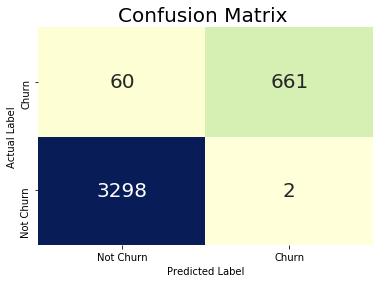

Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3300
           1       1.00      0.92      0.96       721

    accuracy                           0.98      4021
   macro avg       0.99      0.96      0.97      4021
weighted avg       0.98      0.98      0.98      4021

Accuracy : 98.46 %
Precision :  99.7 %
Recall / True Positive Rate :  91.68 %
Specificity / True Negative Rate :  99.94 %
ROC AUC Score: 100.0 %


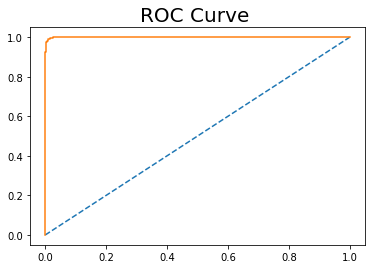

Test data Performance metrics


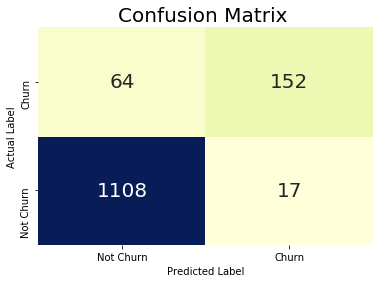

Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1125
           1       0.90      0.70      0.79       216

    accuracy                           0.94      1341
   macro avg       0.92      0.84      0.88      1341
weighted avg       0.94      0.94      0.94      1341

Accuracy : 93.96 %
Precision :  89.94 %
Recall / True Positive Rate :  70.37 %
Specificity / True Negative Rate :  98.49 %
ROC AUC Score: 97.5 %


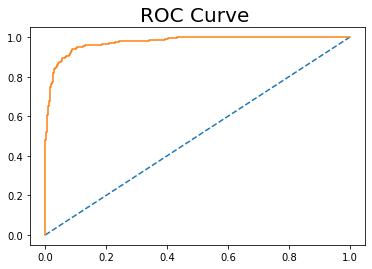

In [68]:
grid_rf=RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_depth=12,max_features=5)
grid_rf.fit(X_train[col_DT],y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(grid_rf,X_train[col_DT],y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(grid_rf,X_test[col_DT],y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Random Forest Tuned'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

Text(0, 0.5, 'Feature Importance Score')

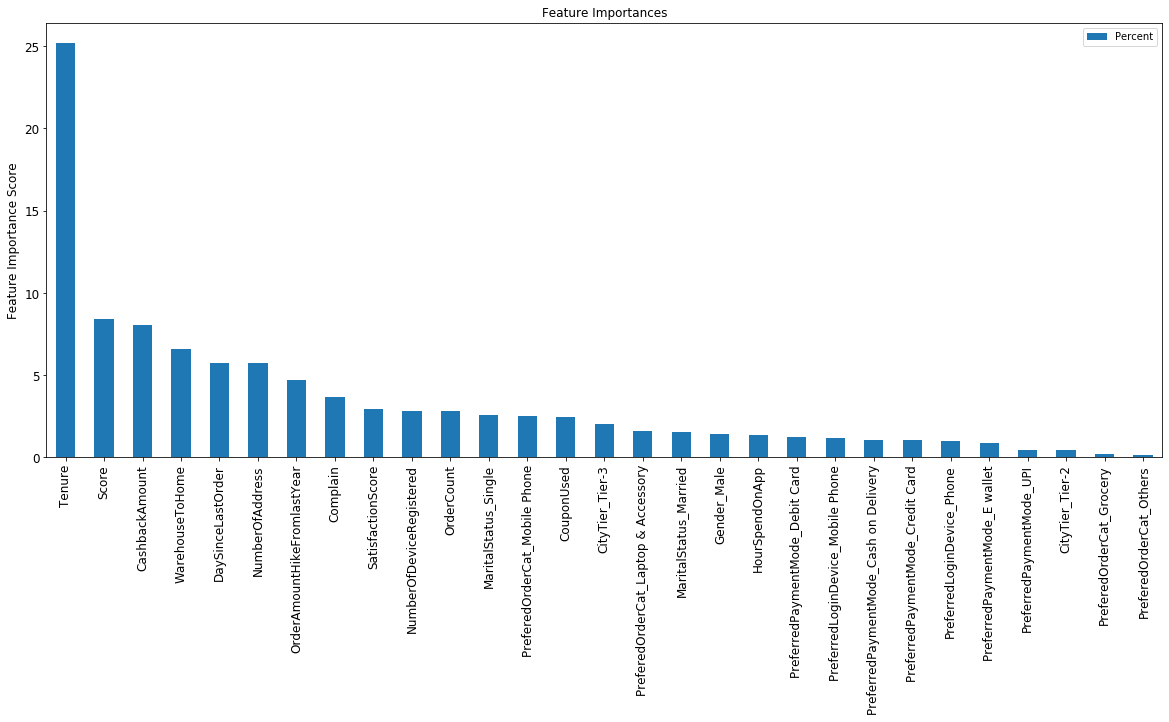

In [69]:
feature_importance=pd.DataFrame((grid_rf.feature_importances_*100).round(2),index=X_train[col_DT].columns,columns=['Percent']).sort_values('Percent',ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances',figsize=(20,8),fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=12)

### Bagging Classifier

Train data Performance metrics


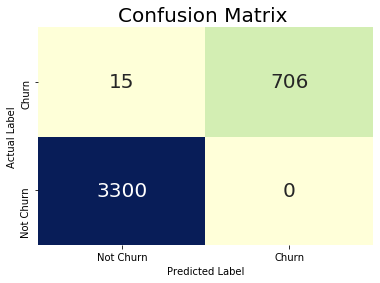

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      0.98      0.99       721

    accuracy                           1.00      4021
   macro avg       1.00      0.99      0.99      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 99.63 %
Precision :  100.0 %
Recall / True Positive Rate :  97.92 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


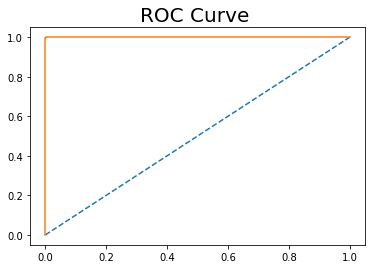

Test data Performance metrics


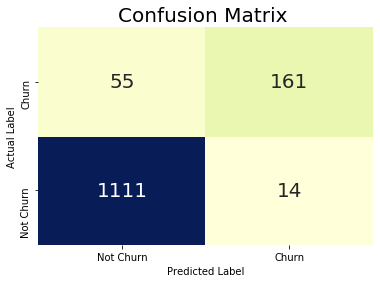

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1125
           1       0.92      0.75      0.82       216

    accuracy                           0.95      1341
   macro avg       0.94      0.87      0.90      1341
weighted avg       0.95      0.95      0.95      1341

Accuracy : 94.85 %
Precision :  92.0 %
Recall / True Positive Rate :  74.54 %
Specificity / True Negative Rate :  98.76 %
ROC AUC Score: 98.0 %


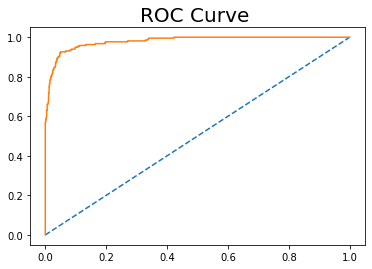

In [70]:
rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=80,random_state=1)
Bagging_model.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(Bagging_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(Bagging_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Bagging RF'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

Train data Performance metrics


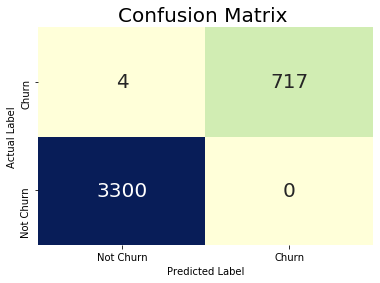

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      0.99      1.00       721

    accuracy                           1.00      4021
   macro avg       1.00      1.00      1.00      4021
weighted avg       1.00      1.00      1.00      4021

Accuracy : 99.9 %
Precision :  100.0 %
Recall / True Positive Rate :  99.45 %
Specificity / True Negative Rate :  100.0 %
ROC AUC Score: 100.0 %


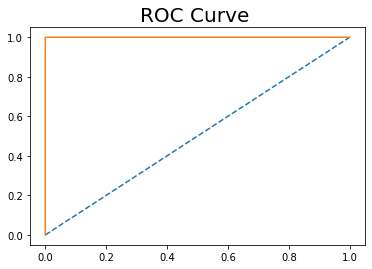

Test data Performance metrics


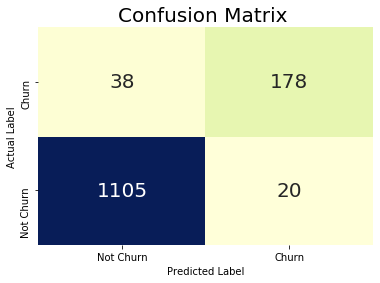

Classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1125
           1       0.90      0.82      0.86       216

    accuracy                           0.96      1341
   macro avg       0.93      0.90      0.92      1341
weighted avg       0.96      0.96      0.96      1341

Accuracy : 95.67 %
Precision :  89.9 %
Recall / True Positive Rate :  82.41 %
Specificity / True Negative Rate :  98.22 %
ROC AUC Score: 97.2 %


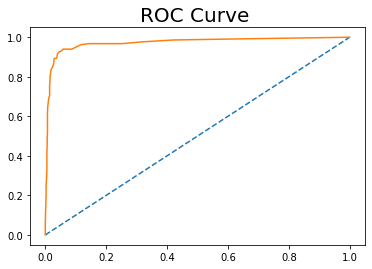

In [71]:
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=50,max_samples=0.8,random_state=1)
Bagging_model.fit(X_train, y_train)
print('Train data Performance metrics')
train_score,train_precision,train_recall=cal_performance_metrics(Bagging_model,X_train,y_train)
print('Test data Performance metrics')
test_score,test_precision,test_recall=cal_performance_metrics(Bagging_model,X_test,y_test)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Bagging CART'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
print(logistic_model.score(X_train_scaled, y_train))
print(logistic_model.score(X_test_scaled, y_test))
#Recall 0.5 bombed

0.8948022879880627
0.8888888888888888


In [73]:
import statsmodels.api as sm
logit_mod = sm.Logit(y_train,X_train)
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.287317
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4021
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                           28
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3891
Time:                        21:28:16   Log-Likelihood:                -1155.3
converged:                       True   LL-Null:                       -1891.3
Covariance Type:            nonrobust   LLR p-value:                7.300e-293
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                   -0.2206      0.012    -18.556      0.000      -0.244      -0.197
HourSpendOnApp                           -0.0846      0.089     -0.946      0.344      -0.260       0.091
NumberOfDeviceRegistered                  0.3962      0.060      6.567      0.000       0.278       0.514
SatisfactionScore                         0.2366      0.062      3.800      0.000       0.115       0.359
NumberOfAddress                           0.2519      0.022     11.288      0.000       0.208       0.296
Complain                                  1.6315      0.278      5.861      0.000       1.086       2.177
OrderAmountHikeFromlastYear              -0.0329      0.015     -2.247      0.025      -0.062      -0.004
DaySinceLastOrder                        -0.1240      0.022     -5.707      0.000      -0.167      -0.081
CashbackAmount                           -0.0211      0.002     -9.024      0.000      -0.026      -0.016
OrderCount                                0.1505      0.031      4.785      0.000       0.089       0.212
CouponUsed                                0.0147      0.045      0.324      0.746      -0.074       0.104
WarehouseToHome                           0.0439      0.007      6.549      0.000       0.031       0.057
Score                                     0.0101      0.016      0.631      0.528      -0.021       0.042
PreferredLoginDevice_Mobile Phone        -0.3988      0.133     -3.003      0.003      -0.659      -0.139
PreferredLoginDevice_Phone               -0.5889      0.144     -4.093      0.000      -0.871      -0.307
CityTier_Tier-2                           0.9865      0.263      3.747      0.000       0.471       1.503
CityTier_Tier-3                           0.6494      0.138      4.715      0.000       0.379       0.919
PreferredPaymentMode_Cash on Delivery     0.8541      0.272      3.146      0.002       0.322       1.386
PreferredPaymentMode_Credit Card          0.0532      0.245      0.217      0.828      -0.428       0.534
PreferredPaymentMode_Debit Card           0.2605      0.232      1.125      0.261      -0.193       0.714
PreferredPaymentMode_E wallet             0.7268      0.291      2.494      0.013       0.156       1.298
PreferredPaymentMode_UPI                  0.0436      0.295      0.148      0.882      -0.535       0.622
Gender_Male                               0.2996      0.111      2.687      0.007       0.081       0.518
PreferedOrderCat_Grocery                  1.1430      0.478      2.390      0.017       0.206       2.080
PreferedOrderCat_Laptop & Accessory      -1.9348      0.190    -10.194      0.000      -2.307      -1.563
PreferedOrderCat_Mobile Phone            -1.0436      0.203     -5.149      0.000      -1.441      -0.646
PreferedOrderCat_Others                   3.5064      0.473      7.418      0.000       2.580       4.433
MaritalStatus_Married                    -0.4494      0.156  

In [74]:
#HourSpendOnApp,CouponUsed,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,
#PreferredPaymentMode_UPI,Score are insignificant variables
import statsmodels.api as sm
logit_mod = sm.Logit(y_train,X_train.drop(['PreferredPaymentMode_UPI','PreferredPaymentMode_Credit Card','CouponUsed','Score','HourSpendOnApp','PreferredPaymentMode_Debit Card'],axis=1))
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.287846
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4021
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                           22
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3880
Time:                        21:28:16   Log-Likelihood:                -1157.4
converged:                       True   LL-Null:                       -1891.3
Covariance Type:            nonrobust   LLR p-value:                2.558e-297
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                   -0.2187      0.012    -18.589      0.000      -0.242      -0.196
NumberOfDeviceRegistered                  0.3873      0.059      6.602      0.000       0.272       0.502
SatisfactionScore                         0.2615      0.040      6.562      0.000       0.183       0.340
NumberOfAddress                           0.2484      0.022     11.196      0.000       0.205       0.292
Complain                                  1.7983      0.113     15.921      0.000       1.577       2.020
OrderAmountHikeFromlastYear              -0.0320      0.015     -2.197      0.028      -0.061      -0.003
DaySinceLastOrder                        -0.1267      0.022     -5.861      0.000      -0.169      -0.084
CashbackAmount                           -0.0213      0.002    -10.590      0.000      -0.025      -0.017
OrderCount                                0.1557      0.024      6.515      0.000       0.109       0.202
WarehouseToHome                           0.0430      0.007      6.471      0.000       0.030       0.056
PreferredLoginDevice_Mobile Phone        -0.4053      0.132     -3.064      0.002      -0.665      -0.146
PreferredLoginDevice_Phone               -0.5781      0.143     -4.044      0.000      -0.858      -0.298
CityTier_Tier-2                           0.9296      0.246      3.782      0.000       0.448       1.411
CityTier_Tier-3                           0.6566      0.137      4.794      0.000       0.388       0.925
PreferredPaymentMode_Cash on Delivery     0.7077      0.179      3.963      0.000       0.358       1.058
PreferredPaymentMode_E wallet             0.5553      0.190      2.928      0.003       0.184       0.927
Gender_Male                               0.3003      0.111      2.712      0.007       0.083       0.517
PreferedOrderCat_Grocery                  1.1966      0.465      2.573      0.010       0.285       2.108
PreferedOrderCat_Laptop & Accessory      -1.9622      0.181    -10.819      0.000      -2.318      -1.607
PreferedOrderCat_Mobile Phone            -1.1054      0.183     -6.050      0.000      -1.464      -0.747
PreferedOrderCat_Others                   3.5182      0.452      7.783      0.000       2.632       4.404
MaritalStatus_Married                    -0.4630      0.155     -2.994      0.003      -0.766      -0.160
MaritalStatus_Single                      0.5970      0.155      3.847      0.000       0.293       0.901
=========================================================================================================
"""

In [75]:
X_vif=X_train.copy()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(X_train[cont]).sort_values(by='VIF', ascending = False)

variables        VIF
9               CashbackAmount  20.168983
2               HourSpendOnApp  18.958197
3     NumberOfDeviceRegistered  14.909679
5  OrderAmountHikeFromlastYear  14.367516
1              WarehouseToHome   4.600477
7                   OrderCount   4.558603
4              NumberOfAddress   4.166384
6                   CouponUsed   3.953262
8            DaySinceLastOrder   3.450077
0                       Tenure   3.099812

In [76]:
import statsmodels.api as sm
logit_mod = sm.Logit(y_train,X_train.drop(['CashbackAmount','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear'],axis=1))
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.305101
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4021
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                           24
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3513
Time:                        21:28:16   Log-Likelihood:                -1226.8
converged:                       True   LL-Null:                       -1891.3
Covariance Type:            nonrobust   LLR p-value:                7.765e-266
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                   -0.2359      0.012    -19.977      0.000      -0.259      -0.213
SatisfactionScore                         0.0498      0.055      0.901      0.368      -0.059       0.158
NumberOfAddress                           0.1842      0.021      8.923      0.000       0.144       0.225
Complain                                  1.0349      0.258      4.005      0.000       0.528       1.541
DaySinceLastOrder                        -0.1602      0.021     -7.613      0.000      -0.201      -0.119
OrderCount                                0.1241      0.031      4.054      0.000       0.064       0.184
CouponUsed                               -0.0134      0.044     -0.308      0.758      -0.099       0.072
WarehouseToHome                           0.0250      0.006      4.007      0.000       0.013       0.037
Score                                     0.0363      0.015      2.389      0.017       0.007       0.066
PreferredLoginDevice_Mobile Phone        -0.5476      0.125     -4.379      0.000      -0.793      -0.303
PreferredLoginDevice_Phone               -0.6453      0.139     -4.631      0.000      -0.918      -0.372
CityTier_Tier-2                           0.8875      0.256      3.466      0.001       0.386       1.389
CityTier_Tier-3                           0.4764      0.132      3.600      0.000       0.217       0.736
PreferredPaymentMode_Cash on Delivery    -0.0070      0.234     -0.030      0.976      -0.466       0.452
PreferredPaymentMode_Credit Card         -0.8611      0.204     -4.227      0.000      -1.260      -0.462
PreferredPaymentMode_Debit Card          -0.6965      0.186     -3.740      0.000      -1.062      -0.331
PreferredPaymentMode_E wallet            -0.2841      0.251     -1.130      0.258      -0.777       0.209
PreferredPaymentMode_UPI                 -0.7212      0.259     -2.784      0.005      -1.229      -0.214
Gender_Male                               0.0784      0.104      0.752      0.452      -0.126       0.283
PreferedOrderCat_Grocery                  0.0951      0.473      0.201      0.841      -0.833       1.023
PreferedOrderCat_Laptop & Accessory      -1.5331      0.163     -9.434      0.000      -1.852      -1.215
PreferedOrderCat_Mobile Phone            -0.5555      0.151     -3.668      0.000      -0.852      -0.259
PreferedOrderCat_Others                   1.2872      0.385      3.344      0.001       0.533       2.042
MaritalStatus_Married                    -0.7915      0.143     -5.543      0.000      -1.071      -0.512
MaritalStatus_Single                      0.2179      0.142      1.535      0.125      -0.060       0.496
=========================================================================================================
"""

In [77]:
data_logit_train=X_train.drop(['CashbackAmount','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','PreferredPaymentMode_Cash on Delivery','CouponUsed','PreferedOrderCat_Grocery','SatisfactionScore','Gender_Male','PreferredPaymentMode_E wallet','MaritalStatus_Single'],axis=1)
data_logit_test=X_test.drop(['CashbackAmount','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','PreferredPaymentMode_Cash on Delivery','CouponUsed','PreferedOrderCat_Grocery','SatisfactionScore','Gender_Male','PreferredPaymentMode_E wallet','MaritalStatus_Single'],axis=1)
logit_mod = sm.Logit(y_train,data_logit_train)
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.305830
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4021
Model:                          Logit   Df Residuals:                     4003
Method:                           MLE   Df Model:                           17
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3498
Time:                        21:28:16   Log-Likelihood:                -1229.7
converged:                       True   LL-Null:                       -1891.3
Covariance Type:            nonrobust   LLR p-value:                5.282e-271
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Tenure                                 -0.2343      0.012    -20.149      0.000      -0.257      -0.212
NumberOfAddress                         0.1914      0.020      9.579      0.000       0.152       0.231
Complain                                0.8755      0.188      4.669      0.000       0.508       1.243
DaySinceLastOrder                      -0.1534      0.020     -7.522      0.000      -0.193      -0.113
OrderCount                              0.1198      0.023      5.295      0.000       0.075       0.164
WarehouseToHome                         0.0267      0.006      4.486      0.000       0.015       0.038
Score                                   0.0463      0.010      4.635      0.000       0.027       0.066
PreferredLoginDevice_Mobile Phone      -0.5291      0.121     -4.372      0.000      -0.766      -0.292
PreferredLoginDevice_Phone             -0.6071      0.137     -4.426      0.000      -0.876      -0.338
CityTier_Tier-2                         0.8840      0.256      3.452      0.001       0.382       1.386
CityTier_Tier-3                         0.4514      0.116      3.891      0.000       0.224       0.679
PreferredPaymentMode_Credit Card       -0.7271      0.144     -5.058      0.000      -1.009      -0.445
PreferredPaymentMode_Debit Card        -0.5563      0.121     -4.586      0.000      -0.794      -0.319
PreferredPaymentMode_UPI               -0.5828      0.216     -2.696      0.007      -1.007      -0.159
PreferedOrderCat_Laptop & Accessory    -1.4835      0.152     -9.752      0.000      -1.782      -1.185
PreferedOrderCat_Mobile Phone          -0.4386      0.129     -3.405      0.001      -0.691      -0.186
PreferedOrderCat_Others                 1.3090      0.380      3.442      0.001       0.564       2.054
MaritalStatus_Married                  -0.9253      0.105     -8.852      0.000      -1.130      -0.720
=======================================================================================================
"""

In [78]:
y_prob_pred_train = result.predict(data_logit_train)
y_prob_pred_test = result.predict(data_logit_test)
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)
y_test_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_test_pred.append(a)

(0, 2)

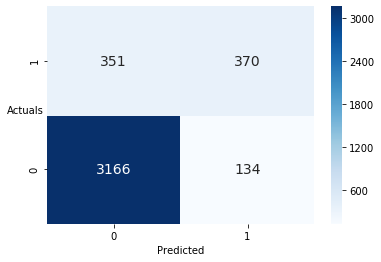

In [79]:
fig, ax = plt.subplots()
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g',cmap='Blues',annot_kws={"size": 14});
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
ax.set_ylim([0,2])


In [89]:
def calculate_metrics(y,y_pred):
    cm1 = metrics.confusion_matrix(y,y_pred)
    print(cm1)
    total1=sum(sum(cm1))
    
    #####from confusion matrix calculate accuracy
    accuracy1=(((cm1[0,0]+cm1[1,1])/total1)*100).round(2)
    print ('Accuracy : ', accuracy1)

    precision=cm1[1,1]/(cm1[1,1]+cm1[0,1]) # Of all 1's predicted, how many were predicted right.
    precision=(precision*100).round(2)
    print('Precision : ',precision,'%') #False positive , alpha Type 1 error
    
    sensitivity1 = (cm1[1,1]/(cm1[1,1]+cm1[1,0]))*100
    print('Sensitivity / Recall / True Positive Rate : ', sensitivity1.round(2)) # How many actual true data points are identified by model
#Type2 Error
    specificity1 = (cm1[0,0]/(cm1[0,1]+cm1[0,0]))*100
    print('Specificity : ', specificity1.round(2)) # How many negative points identified by model
    
    print(metrics.classification_report(y,y_pred,digits=3))
    
    return accuracy1,precision,sensitivity1.round(2)
    
    
print('Train data Performance metrics')
train_score,train_precision,train_recall=calculate_metrics(y_train,y_class_pred)
print('Test data Performance metrics')
test_score,test_precision,test_recall=calculate_metrics(y_test,y_test_pred)

Train data Performance metrics
[[2887  413]
 [ 182  539]]
Accuracy :  85.2
Precision :  56.62 %
Sensitivity / Recall / True Positive Rate :  74.76
Specificity :  87.48
              precision    recall  f1-score   support

           0      0.941     0.875     0.907      3300
           1      0.566     0.748     0.644       721

    accuracy                          0.852      4021
   macro avg      0.753     0.811     0.775      4021
weighted avg      0.874     0.852     0.860      4021

Test data Performance metrics
[[990 135]
 [ 65 151]]
Accuracy :  85.09
Precision :  52.8 %
Sensitivity / Recall / True Positive Rate :  69.91
Specificity :  88.0
              precision    recall  f1-score   support

           0      0.938     0.880     0.908      1125
           1      0.528     0.699     0.602       216

    accuracy                          0.851      1341
   macro avg      0.733     0.790     0.755      1341
weighted avg      0.872     0.851     0.859      1341



In [96]:
fpr, tpr, thresholds = roc_curve(y_train,y_prob_pred_train)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2867607938218803

In [105]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.29:
        a=1
    else:
        a=0
    y_class_pred.append(a)
train_score,train_precision,train_recall=calculate_metrics(y_train,y_class_pred)

y_test_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.29:
        a=1
    else:
        a=0
    y_test_pred.append(a)
test_score,test_precision,test_recall=calculate_metrics(y_test,y_test_pred)
temp_accuracyDF=pd.DataFrame({'Train Score':train_score,'Test Score':test_score,'Train Precision':train_precision,'Test Precision':test_precision,'Train Recall':train_recall,'Test Recall':test_recall},index=['Logistic regression'])
model_accuracyDF=pd.concat([model_accuracyDF,temp_accuracyDF])

[[2887  413]
 [ 182  539]]
Accuracy :  85.2
Precision :  56.62 %
Sensitivity / Recall / True Positive Rate :  74.76
Specificity :  87.48
              precision    recall  f1-score   support

           0      0.941     0.875     0.907      3300
           1      0.566     0.748     0.644       721

    accuracy                          0.852      4021
   macro avg      0.753     0.811     0.775      4021
weighted avg      0.874     0.852     0.860      4021

[[990 135]
 [ 65 151]]
Accuracy :  85.09
Precision :  52.8 %
Sensitivity / Recall / True Positive Rate :  69.91
Specificity :  88.0
              precision    recall  f1-score   support

           0      0.938     0.880     0.908      1125
           1      0.528     0.699     0.602       216

    accuracy                          0.851      1341
   macro avg      0.733     0.790     0.755      1341
weighted avg      0.872     0.851     0.859      1341



In [83]:
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary

Coef
Tenure                              -0.234333
NumberOfAddress                      0.191381
Complain                             0.875549
DaySinceLastOrder                   -0.153406
OrderCount                           0.119756
WarehouseToHome                      0.026657
Score                                0.046311
PreferredLoginDevice_Mobile Phone   -0.529149
PreferredLoginDevice_Phone          -0.607060
CityTier_Tier-2                      0.883967
CityTier_Tier-3                      0.451418
PreferredPaymentMode_Credit Card    -0.727103
PreferredPaymentMode_Debit Card     -0.556280
PreferredPaymentMode_UPI            -0.582833
PreferedOrderCat_Laptop & Accessory -1.483460
PreferedOrderCat_Mobile Phone       -0.438648
PreferedOrderCat_Others              1.308971
MaritalStatus_Married               -0.925337

In [84]:
# Interpreting the Coefficients
coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['Prob'] = (coef_summary['Odds'])/(coef_summary['Odds']+1)
coef_summary

Coef      Odds      Prob
Tenure                              -0.234333  0.791098  0.441683
NumberOfAddress                      0.191381  1.210920  0.547700
Complain                             0.875549  2.400193  0.705899
DaySinceLastOrder                   -0.153406  0.857781  0.461723
OrderCount                           0.119756  1.127221  0.529903
WarehouseToHome                      0.026657  1.027016  0.506664
Score                                0.046311  1.047400  0.511576
PreferredLoginDevice_Mobile Phone   -0.529149  0.589106  0.370715
PreferredLoginDevice_Phone          -0.607060  0.544951  0.352730
CityTier_Tier-2                      0.883967  2.420484  0.707644
CityTier_Tier-3                      0.451418  1.570538  0.610976
PreferredPaymentMode_Credit Card    -0.727103  0.483307  0.325831
PreferredPaymentMode_Debit Card     -0.556280  0.573338  0.364409
PreferredPaymentMode_UPI            -0.582833  0.558314  0.358281
PreferedOrderCat_Laptop & Accessory -1.483460  0.226851  0.184905
PreferedOrderCat_Mobile Phone       -0.438648  0.644908  0.392063
PreferedOrderCat_Others              1.308971  3.702363  0.787341
MaritalStatus_Married               -0.925337  0.396398  0.283872

We can interpret the above model using the probability coefficients for example if a customer is in a tier-3 city the probability for churning increases by 63%, also for every unit increase in the cashback amount the probability reduces by 49.7% etc.

In [106]:
model_accuracyDF.sort_values('Test Recall',ascending=False)

Train Score  Test Score  Train Precision  \
MLP Tuned                     100.00       96.94           100.00   
Decision Tree                 100.00       94.78           100.00   
Random Forest                 100.00       96.57           100.00   
Bagging CART                   99.90       95.67           100.00   
SVM Tuned                      98.86       96.20            99.13   
AdaBoost Tuned                 98.31       94.78            98.23   
MLP                            99.70       95.53           100.00   
Bagging RF                     99.63       94.85           100.00   
Random Forest Tuned            98.46       93.96            99.70   
Logistic regression            85.20       85.09            56.62   
Gradient Boosting Tuned        95.03       92.69            91.95   
Naive Bayes                    77.10       78.75            41.72   
Decision Tree Tuned            96.82       91.80            94.72   
KNN                            95.00       91.95            93.05   
Gradient Boosting              93.19       91.35            88.21   
XGBoost                        92.22       90.31            86.43   
AdaBoost                       89.98       89.41            76.95   
LDA Log Transformed            89.53       88.37            75.51   
SVM                            93.26       91.28            94.12   
LDA                            88.44       87.70            76.78   

                         Test Precision  Train Recall  Test Recall  
MLP Tuned                         91.47        100.00        89.35  
Decision Tree                     81.74        100.00        87.04  
Random Forest                     93.37        100.00        84.72  
Bagging CART                      89.90         99.45        82.41  
SVM Tuned                         96.09         94.45        79.63  
AdaBoost Tuned                    88.02         92.23        78.24  
MLP                               93.33         98.34        77.78  
Bagging RF                        92.00         97.92        74.54  
Random Forest Tuned               89.94         91.68        70.37  
Logistic regression               52.80         74.76        69.91  
Gradient Boosting Tuned           82.07         79.20        69.91  
Naive Bayes                       40.55         69.90        68.52  
Decision Tree Tuned               78.19         87.10        68.06  
KNN                               82.53         77.95        63.43  
Gradient Boosting                 79.41         71.57        62.50  
XGBoost                           76.54         67.13        57.41  
AdaBoost                          71.51         62.97        56.94  
LDA Log Transformed               67.05         61.58        54.63  
SVM                               86.13         66.57        54.63  
LDA                               67.83         50.90        44.91

In [107]:
model_accuracyDF.sort_values('Test Precision',ascending=False)

Train Score  Test Score  Train Precision  \
SVM Tuned                      98.86       96.20            99.13   
Random Forest                 100.00       96.57           100.00   
MLP                            99.70       95.53           100.00   
Bagging RF                     99.63       94.85           100.00   
MLP Tuned                     100.00       96.94           100.00   
Random Forest Tuned            98.46       93.96            99.70   
Bagging CART                   99.90       95.67           100.00   
AdaBoost Tuned                 98.31       94.78            98.23   
SVM                            93.26       91.28            94.12   
KNN                            95.00       91.95            93.05   
Gradient Boosting Tuned        95.03       92.69            91.95   
Decision Tree                 100.00       94.78           100.00   
Gradient Boosting              93.19       91.35            88.21   
Decision Tree Tuned            96.82       91.80            94.72   
XGBoost                        92.22       90.31            86.43   
AdaBoost                       89.98       89.41            76.95   
LDA                            88.44       87.70            76.78   
LDA Log Transformed            89.53       88.37            75.51   
Logistic regression            85.20       85.09            56.62   
Naive Bayes                    77.10       78.75            41.72   

                         Test Precision  Train Recall  Test Recall  
SVM Tuned                         96.09         94.45        79.63  
Random Forest                     93.37        100.00        84.72  
MLP                               93.33         98.34        77.78  
Bagging RF                        92.00         97.92        74.54  
MLP Tuned                         91.47        100.00        89.35  
Random Forest Tuned               89.94         91.68        70.37  
Bagging CART                      89.90         99.45        82.41  
AdaBoost Tuned                    88.02         92.23        78.24  
SVM                               86.13         66.57        54.63  
KNN                               82.53         77.95        63.43  
Gradient Boosting Tuned           82.07         79.20        69.91  
Decision Tree                     81.74        100.00        87.04  
Gradient Boosting                 79.41         71.57        62.50  
Decision Tree Tuned               78.19         87.10        68.06  
XGBoost                           76.54         67.13        57.41  
AdaBoost                          71.51         62.97        56.94  
LDA                               67.83         50.90        44.91  
LDA Log Transformed               67.05         61.58        54.63  
Logistic regression               52.80         74.76        69.91  
Naive Bayes                       40.55         69.90        68.52

In [108]:
model_accuracyDF.sort_index()

Train Score  Test Score  Train Precision  \
AdaBoost                       89.98       89.41            76.95   
AdaBoost Tuned                 98.31       94.78            98.23   
Bagging CART                   99.90       95.67           100.00   
Bagging RF                     99.63       94.85           100.00   
Decision Tree                 100.00       94.78           100.00   
Decision Tree Tuned            96.82       91.80            94.72   
Gradient Boosting              93.19       91.35            88.21   
Gradient Boosting Tuned        95.03       92.69            91.95   
KNN                            95.00       91.95            93.05   
LDA                            88.44       87.70            76.78   
LDA Log Transformed            89.53       88.37            75.51   
Logistic regression            85.20       85.09            56.62   
MLP                            99.70       95.53           100.00   
MLP Tuned                     100.00       96.94           100.00   
Naive Bayes                    77.10       78.75            41.72   
Random Forest                 100.00       96.57           100.00   
Random Forest Tuned            98.46       93.96            99.70   
SVM                            93.26       91.28            94.12   
SVM Tuned                      98.86       96.20            99.13   
XGBoost                        92.22       90.31            86.43   

                         Test Precision  Train Recall  Test Recall  
AdaBoost                          71.51         62.97        56.94  
AdaBoost Tuned                    88.02         92.23        78.24  
Bagging CART                      89.90         99.45        82.41  
Bagging RF                        92.00         97.92        74.54  
Decision Tree                     81.74        100.00        87.04  
Decision Tree Tuned               78.19         87.10        68.06  
Gradient Boosting                 79.41         71.57        62.50  
Gradient Boosting Tuned           82.07         79.20        69.91  
KNN                               82.53         77.95        63.43  
LDA                               67.83         50.90        44.91  
LDA Log Transformed               67.05         61.58        54.63  
Logistic regression               52.80         74.76        69.91  
MLP                               93.33         98.34        77.78  
MLP Tuned                         91.47        100.00        89.35  
Naive Bayes                       40.55         69.90        68.52  
Random Forest                     93.37        100.00        84.72  
Random Forest Tuned               89.94         91.68        70.37  
SVM                               86.13         66.57        54.63  
SVM Tuned                         96.09         94.45        79.63  
XGBoost                           76.54         67.13        57.41